In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import random
pd.set_option('display.max_columns', 1000)
pd.options.display.float_format = '{:.1f}'.format
import warnings
warnings.filterwarnings('ignore')


In [253]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.ensemble import RandomForestClassifier

In [4]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [833]:
#Importing train Dataset
import io
df=pd.read_csv(io.BytesIO(uploaded['train.csv']))
df.head(20)

,'ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
0,APPC90493171225,Female,23/07/79,15/07/16,C10001,A,COM0044082,A,4.0,2000.0,B001,P,N,S122,G,0.0,nan,nan,nan,nan,0,0
1,APPD40611263344,Male,07/12/86,04/07/16,C10003,A,COM0000002,C,1.0,3500.0,B002,P,Y,S122,G,0.0,20000.0,2.0,13.2,953.0,10,0
2,APPE70289249423,Male,10/12/82,19/07/16,C10125,C,COM0005267,C,4.0,2250.0,B003,G,Y,S143,B,0.0,45000.0,4.0,nan,nan,0,0
3,APPF80273865537,Male,30/01/89,09/07/16,C10477,C,COM0004143,A,4.0,3500.0,B003,G,Y,S143,B,0.0,92000.0,5.0,nan,nan,7,0
4,APPG60994436641,Male,19/04/85,20/07/16,C10002,A,COM0001781,A,4.0,10000.0,B001,P,Y,S134,B,2500.0,50000.0,2.0,nan,nan,10,0
5,APPI90914237819,Female,23/12/88,01/07/16,C10402,C,COM0007740,A,4.0,7000.0,B014,P,N,S133,B,0.0,nan,nan,nan,nan,0,0
6,APPK80327232033,Male,28/03/73,02/07/16,C10022,B,COM0030526,B,4.0,7500.0,B003,G,Y,S122,C,0.0,130000.0,5.0,14.8,3082.0,10,0
7,APPL20820172146,Female,12/11/90,03/07/16,C10003,A,COM0016738,A,4.0,3000.0,B006,P,Y,S133,B,0.0,30000.0,3.0,18.2,1088.0,0,0
8,APPM30977401211,Male,03/03/77,02/07/16,C10003,A,COM0010626,A,4.0,2500.0,B017,G,Y,S133,B,0.0,66000.0,5.0,20.0,1749.0,7,0
9,APPN60714112334,Female,13/12/90,02/07/16,C10014,B,COM0042212,A,4.0,2500.0,NaN,NaN,N,S122,B,0.0,nan,nan,nan,nan,0,0


In [12]:
#importing test Dataset

df_test=pd.read_csv(io.BytesIO(uploaded['test.csv']))
df_test.head()

,'ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1
0,APPA70109647212,Male,03/06/88,05/07/16,C10028,C,COM0002222,A,4.0,2150.0,B002,P,Y,S122,B,0.0,10000.0,3.0,20.0,372.0,4
1,APPB10687939341,Male,13/07/81,01/07/16,C10003,A,COM0001784,C,4.0,4200.0,B004,P,Y,S133,C,0.0,69000.0,5.0,24.0,1985.0,7
2,APPC80449411414,Female,19/11/90,01/07/16,C10009,B,COM0045260,B,4.0,1000.0,B002,P,N,S133,B,0.0,nan,nan,nan,nan,0
3,APPD30665094501,Female,15/10/92,01/07/16,C10005,A,COM0000085,A,3.0,1465.0,B001,P,N,S133,C,0.0,nan,nan,nan,nan,0
4,APPE80379821637,Male,21/09/88,01/07/16,C10005,A,COM0006422,A,4.0,2340.0,B004,P,Y,S143,B,500.0,10000.0,2.0,nan,nan,0


In [13]:
#Shape

df.shape

(69713, 22)

In [14]:
df_test.shape

(30037, 21)

In [15]:
#Train Data Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69713 entries, 0 to 69712
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   'ID                                  69713 non-null  object 
 1   Gender                               69713 non-null  object 
 2   DOB                                  69698 non-null  object 
 3   Lead_Creation_Date                   69713 non-null  object 
 4   City_Code                            68899 non-null  object 
 5   City_Category                        68899 non-null  object 
 6   Employer_Code                        65695 non-null  object 
 7   Employer_Category1                   65695 non-null  object 
 8   Employer_Category2                   65415 non-null  float64
 9   Monthly_Income                       69713 non-null  float64
 10  Customer_Existing_Primary_Bank_Code  60322 non-null  object 
 11  Primary_Bank_Type           

In [16]:
#Test Data Information

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30037 entries, 0 to 30036
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   'ID                                  30037 non-null  object 
 1   Gender                               30037 non-null  object 
 2   DOB                                  30034 non-null  object 
 3   Lead_Creation_Date                   30037 non-null  object 
 4   City_Code                            29723 non-null  object 
 5   City_Category                        29723 non-null  object 
 6   Employer_Code                        28432 non-null  object 
 7   Employer_Category1                   28432 non-null  object 
 8   Employer_Category2                   28342 non-null  float64
 9   Monthly_Income                       30037 non-null  float64
 10  Customer_Existing_Primary_Bank_Code  26000 non-null  object 
 11  Primary_Bank_Type           

# Data Imputation & Data Cleaning

In [17]:
#Checking percentage of null values

round((df.isnull().sum(axis=0)/df.shape[0])*100,2)

'ID                                    0.0
Gender                                 0.0
DOB                                    0.0
Lead_Creation_Date                     0.0
City_Code                              1.2
City_Category                          1.2
Employer_Code                          5.8
Employer_Category1                     5.8
Employer_Category2                     6.2
Monthly_Income                         0.0
Customer_Existing_Primary_Bank_Code   13.5
Primary_Bank_Type                     13.5
Contacted                              0.0
Source                                 0.0
Source_Category                        0.0
Existing_EMI                           0.1
Loan_Amount                           39.8
Loan_Period                           39.8
Interest_Rate                         68.0
EMI                                   68.0
Var1                                   0.0
Approved                               0.0
dtype: float64

In [18]:
#Checking percentage of null values in test data

round((df_test.isnull().sum(axis=0)/df_test.shape[0])*100,2)

'ID                                    0.0
Gender                                 0.0
DOB                                    0.0
Lead_Creation_Date                     0.0
City_Code                              1.1
City_Category                          1.1
Employer_Code                          5.3
Employer_Category1                     5.3
Employer_Category2                     5.6
Monthly_Income                         0.0
Customer_Existing_Primary_Bank_Code   13.4
Primary_Bank_Type                     13.4
Contacted                              0.0
Source                                 0.0
Source_Category                        0.0
Existing_EMI                           0.1
Loan_Amount                           39.5
Loan_Period                           39.5
Interest_Rate                         67.9
EMI                                   67.9
Var1                                   0.0
dtype: float64

In [19]:
#City Code - Value Counts
df['City_Code'].value_counts()

C10001    10007
C10002     8716
C10003     8666
C10004     5843
C10005     5564
          ...  
C10597        1
C10537        1
C10543        1
C10668        1
C10544        1
Name: City_Code, Length: 678, dtype: int64

In [20]:
#Imputation in variable - City_Code

df['City_Code']=df['City_Code'].fillna('C19999')

df_test['City_Code']=df_test['City_Code'].fillna('C19999')

In [21]:
#Value Counts of City_Category
df['City_Category'].value_counts(dropna=False)

A      49885
C      11694
B       7320
NaN      814
Name: City_Category, dtype: int64

In [22]:
#Imputation in variable - City_Category

df['City_Category']=df['City_Category'].fillna('N')

df_test['City_Category']=df_test['City_Category'].fillna('N')

In [23]:
#Value Counts of Employer_Code

df['Employer_Code'].value_counts(dropna=False)

NaN           4018
COM0000002     457
COM0000003     324
COM0000004     262
COM0000005     243
              ... 
COM0018609       1
COM0039173       1
COM0044652       1
COM0053319       1
COM0016984       1
Name: Employer_Code, Length: 36618, dtype: int64

In [24]:
#Imputation in variable - Employer_Code

df['Employer_Code']=df['Employer_Code'].fillna('COM9999999')

df_test['Employer_Code']=df_test['Employer_Code'].fillna('COM9999999')

In [25]:
#Value Counts of Employer_Category1

df['Employer_Category1'].value_counts(dropna=False)

A      33336
B      18056
C      14303
NaN     4018
Name: Employer_Category1, dtype: int64

In [26]:
#Imputation in variable - Employer_Category1

df['Employer_Category1']=df['Employer_Category1'].fillna('No_Code')

df_test['Employer_Category1']=df_test['Employer_Category1'].fillna('No_Code')

In [27]:
#Value Counts of Employer_Category2
df['Employer_Category2'].value_counts(dropna=False)

4.0    57582
nan     4298
1.0     4258
2.0     1955
3.0     1620
Name: Employer_Category2, dtype: int64

In [28]:
#Imputation in variable - Employer_Category2

df['Employer_Category2']=df['Employer_Category2'].fillna('0.0')

df_test['Employer_Category2']=df_test['Employer_Category2'].fillna('0.0')

In [29]:
#Value Counts of Customer_Existing_Primary_Bank_Code

df['Customer_Existing_Primary_Bank_Code'].value_counts().head()

B001    14197
B002    10880
B003     9515
B004     7070
B005     1920
Name: Customer_Existing_Primary_Bank_Code, dtype: int64

In [30]:
#Imputation in variable - Customer_Existing_Primary_Bank_Code

df['Customer_Existing_Primary_Bank_Code']=df['Customer_Existing_Primary_Bank_Code'].fillna('0.0')

df_test['Customer_Existing_Primary_Bank_Code']=df_test['Customer_Existing_Primary_Bank_Code'].fillna('0.0')

In [31]:
#Value Counts of Primary_Bank_Type

df['Primary_Bank_Type'].value_counts(dropna=False)

P      39619
G      20703
NaN     9391
Name: Primary_Bank_Type, dtype: int64

In [32]:
#Imputation in variable - Primary_Bank_Type

df['Primary_Bank_Type']=df['Primary_Bank_Type'].fillna('BN')

df_test['Primary_Bank_Type']=df_test['Primary_Bank_Type'].fillna('BN')

In [33]:
#Checking percentage of Missing value remain in dataset

round((df.isnull().sum(axis=0)/df.shape[0])*100,2)

'ID                                    0.0
Gender                                 0.0
DOB                                    0.0
Lead_Creation_Date                     0.0
City_Code                              0.0
City_Category                          0.0
Employer_Code                          0.0
Employer_Category1                     0.0
Employer_Category2                     0.0
Monthly_Income                         0.0
Customer_Existing_Primary_Bank_Code    0.0
Primary_Bank_Type                      0.0
Contacted                              0.0
Source                                 0.0
Source_Category                        0.0
Existing_EMI                           0.1
Loan_Amount                           39.8
Loan_Period                           39.8
Interest_Rate                         68.0
EMI                                   68.0
Var1                                   0.0
Approved                               0.0
dtype: float64

In [34]:
#Creating one variable that contains the 1 in place of null value in 'Loan_ Period'- (In Test and Train Both)

df["Loan_Period_Miss"] = np.where(df['Loan_Period'].isnull(), 1, 0)
df_test["Loan_Period_Miss"] = np.where(df_test['Loan_Period'].isnull(), 1, 0)

In [35]:
#Creating one variable that contains the 1 in place of null value in 'Interest_Rate'- (In Test and Train Both)

df["Interest_Rate_Miss"] = np.where(df['Interest_Rate'].isnull(), 1, 0)
df_test["Interest_Rate_Miss"] = np.where(df_test['Interest_Rate'].isnull(), 1, 0)

# KNN Imputation

In [36]:
#Importing KNN Imputer
from sklearn.impute import KNNImputer

In [37]:
#Selecting Variables for KNN Imputation

df.loc[:,['Loan_Amount','Loan_Period','Interest_Rate','Existing_EMI','EMI']]

df_test.loc[:,['Loan_Amount','Loan_Period','Interest_Rate','Existing_EMI','EMI']]

,Loan_Amount,Loan_Period,Interest_Rate,Existing_EMI,EMI
0,10000.0,3.0,20.0,0.0,372.0
1,69000.0,5.0,24.0,0.0,1985.0
2,nan,nan,nan,0.0,nan
3,nan,nan,nan,0.0,nan
4,10000.0,2.0,nan,500.0,nan
...,...,...,...,...,...
30032,20000.0,4.0,31.5,0.0,738.0
30033,32000.0,4.0,nan,0.0,nan
30034,nan,nan,nan,350.0,nan
30035,nan,nan,nan,1000.0,nan


In [38]:
#Object Creation

imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [39]:
#Fit-Transform on Train Data
x=imputer.fit_transform(df.loc[:,['Loan_Amount','Loan_Period','Interest_Rate','Existing_EMI','EMI']])



In [40]:
#Transform on Test  Data
y=imputer.transform(df_test.loc[:,['Loan_Amount','Loan_Period','Interest_Rate','Existing_EMI','EMI']])

In [41]:
#Create Temporary Dataset with new imputed columns for Train & Test Seperately

dataframe=pd.DataFrame(x, columns=['Loan_Amount','Loan_Period','Interest_Rate','Existing_EMI','EMI'])

dataframe_t=pd.DataFrame(y, columns=['Loan_Amount','Loan_Period','Interest_Rate','Existing_EMI','EMI'])


In [42]:
#Shape
dataframe.shape

(69713, 5)

In [43]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69713 entries, 0 to 69712
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Loan_Amount    69713 non-null  float64
 1   Loan_Period    69713 non-null  float64
 2   Interest_Rate  69713 non-null  float64
 3   Existing_EMI   69713 non-null  float64
 4   EMI            69713 non-null  float64
dtypes: float64(5)
memory usage: 2.7 MB


In [44]:
#Shape
dataframe_t.shape

(30037, 5)

In [45]:
dataframe_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30037 entries, 0 to 30036
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Loan_Amount    30037 non-null  float64
 1   Loan_Period    30037 non-null  float64
 2   Interest_Rate  30037 non-null  float64
 3   Existing_EMI   30037 non-null  float64
 4   EMI            30037 non-null  float64
dtypes: float64(5)
memory usage: 1.1 MB


In [46]:
#Dropping Existing columns from orignal Train & Test dataset because I have already created new KNN imputed dataset for 
#these columns. In next step I will concacat orignal and datasets.

df.drop(['Loan_Amount','Loan_Period','Interest_Rate','Existing_EMI','EMI'],axis=1,inplace=True)

df_test.drop(['Loan_Amount','Loan_Period','Interest_Rate','Existing_EMI','EMI'],axis=1,inplace=True)

In [47]:
df.shape

(69713, 19)

In [48]:
df_test.shape

(30037, 18)

In [49]:
#Concating orignal train dataset with new imputed dataset.

df1 = pd.concat([df, dataframe], axis=1, join='inner')
df1.shape

(69713, 24)

In [50]:
#Concating orignal test dataset with new imputed dataset.

dft = pd.concat([df_test, dataframe_t], axis=1, join='inner')
dft.shape

(30037, 23)

In [51]:
df1.head()

,'ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Var1,Approved,Loan_Period_Miss,Interest_Rate_Miss,Loan_Amount,Loan_Period,Interest_Rate,Existing_EMI,EMI
0,APPC90493171225,Female,23/07/79,15/07/16,C10001,A,COM0044082,A,4.0,2000.0,B001,P,N,S122,G,0,0,1,1,52400.0,4.2,23.9,0.0,1533.8
1,APPD40611263344,Male,07/12/86,04/07/16,C10003,A,COM0000002,C,1.0,3500.0,B002,P,Y,S122,G,10,0,0,0,20000.0,2.0,13.2,0.0,953.0
2,APPE70289249423,Male,10/12/82,19/07/16,C10125,C,COM0005267,C,4.0,2250.0,B003,G,Y,S143,B,0,0,0,1,45000.0,4.0,17.9,0.0,1323.2
3,APPF80273865537,Male,30/01/89,09/07/16,C10477,C,COM0004143,A,4.0,3500.0,B003,G,Y,S143,B,7,0,0,1,92000.0,5.0,19.3,0.0,2402.0
4,APPG60994436641,Male,19/04/85,20/07/16,C10002,A,COM0001781,A,4.0,10000.0,B001,P,Y,S134,B,10,0,0,1,50000.0,2.0,15.2,2500.0,1302.6


In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69713 entries, 0 to 69712
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   'ID                                  69713 non-null  object 
 1   Gender                               69713 non-null  object 
 2   DOB                                  69698 non-null  object 
 3   Lead_Creation_Date                   69713 non-null  object 
 4   City_Code                            69713 non-null  object 
 5   City_Category                        69713 non-null  object 
 6   Employer_Code                        69713 non-null  object 
 7   Employer_Category1                   69713 non-null  object 
 8   Employer_Category2                   69713 non-null  object 
 9   Monthly_Income                       69713 non-null  float64
 10  Customer_Existing_Primary_Bank_Code  69713 non-null  object 
 11  Primary_Bank_Type           

In [53]:
dft.shape

(30037, 23)

In [54]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30037 entries, 0 to 30036
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   'ID                                  30037 non-null  object 
 1   Gender                               30037 non-null  object 
 2   DOB                                  30034 non-null  object 
 3   Lead_Creation_Date                   30037 non-null  object 
 4   City_Code                            30037 non-null  object 
 5   City_Category                        30037 non-null  object 
 6   Employer_Code                        30037 non-null  object 
 7   Employer_Category1                   30037 non-null  object 
 8   Employer_Category2                   30037 non-null  object 
 9   Monthly_Income                       30037 non-null  float64
 10  Customer_Existing_Primary_Bank_Code  30037 non-null  object 
 11  Primary_Bank_Type           

In [55]:
#Checking percentage of missing values

round((df1.isnull().sum(axis=0)/df.shape[0])*100,2)

'ID                                   0.0
Gender                                0.0
DOB                                   0.0
Lead_Creation_Date                    0.0
City_Code                             0.0
City_Category                         0.0
Employer_Code                         0.0
Employer_Category1                    0.0
Employer_Category2                    0.0
Monthly_Income                        0.0
Customer_Existing_Primary_Bank_Code   0.0
Primary_Bank_Type                     0.0
Contacted                             0.0
Source                                0.0
Source_Category                       0.0
Var1                                  0.0
Approved                              0.0
Loan_Period_Miss                      0.0
Interest_Rate_Miss                    0.0
Loan_Amount                           0.0
Loan_Period                           0.0
Interest_Rate                         0.0
Existing_EMI                          0.0
EMI                               

In [56]:
df1['DOB'].head()

0    23/07/79
1    07/12/86
2    10/12/82
3    30/01/89
4    19/04/85
Name: DOB, dtype: object

In [57]:
#Imputing DOB - Train Data
mean_dob=df1['DOB'].mode()
df1['DOB']=df1['DOB'].fillna(mean_dob[0])

In [58]:
#Imputing DOB - Test Data
mean_dob=dft['DOB'].mode()
dft['DOB']=dft['DOB'].fillna(mean_dob[0])

In [59]:
#Checking number of missing values left in each column - Train Data

(df1.isnull().sum(axis=0))

'ID                                    0
Gender                                 0
DOB                                    0
Lead_Creation_Date                     0
City_Code                              0
City_Category                          0
Employer_Code                          0
Employer_Category1                     0
Employer_Category2                     0
Monthly_Income                         0
Customer_Existing_Primary_Bank_Code    0
Primary_Bank_Type                      0
Contacted                              0
Source                                 0
Source_Category                        0
Var1                                   0
Approved                               0
Loan_Period_Miss                       0
Interest_Rate_Miss                     0
Loan_Amount                            0
Loan_Period                            0
Interest_Rate                          0
Existing_EMI                           0
EMI                                    0
dtype: int64

In [60]:
#Checking number of missing values left in each column-  Test Data

(dft.isnull().sum(axis=0))

'ID                                    0
Gender                                 0
DOB                                    0
Lead_Creation_Date                     0
City_Code                              0
City_Category                          0
Employer_Code                          0
Employer_Category1                     0
Employer_Category2                     0
Monthly_Income                         0
Customer_Existing_Primary_Bank_Code    0
Primary_Bank_Type                      0
Contacted                              0
Source                                 0
Source_Category                        0
Var1                                   0
Loan_Period_Miss                       0
Interest_Rate_Miss                     0
Loan_Amount                            0
Loan_Period                            0
Interest_Rate                          0
Existing_EMI                           0
EMI                                    0
dtype: int64

In [61]:
#Function for changing Loan_Period

import math
def data1(n):
    if math.ceil(n)-n>=0.5:
        return math.floor(n)
    else:
        return math.ceil(n)
                             

In [62]:
#Applied Function

df1['Loan_Period']=df1['Loan_Period'].apply(data1)

In [63]:
#Value_counts of Loan_Period
df1['Loan_Period'].head(20)

0     4
1     2
2     4
3     5
4     2
5     4
6     5
7     3
8     5
9     4
10    5
11    5
12    4
13    5
14    5
15    4
16    5
17    4
18    2
19    4
Name: Loan_Period, dtype: int64

In [64]:
#Applied Function on Test Data
dft['Loan_Period']=dft['Loan_Period'].apply(data1)

In [65]:

df1['DOB'].head()

0    23/07/79
1    07/12/86
2    10/12/82
3    30/01/89
4    19/04/85
Name: DOB, dtype: object

In [66]:
#Import Datetime

import datetime
from datetime import date

In [67]:
#Change datre format

date_format = "%d/%m/%y"
df1.DOB = pd.to_datetime(df1.DOB, format=date_format)

In [68]:
df1.DOB.head(50)

0    1979-07-23
1    1986-12-07
2    1982-12-10
3    1989-01-30
4    1985-04-19
5    1988-12-23
6    1973-03-28
7    1990-11-12
8    1977-03-03
9    1990-12-13
10   1983-08-24
11   1986-12-11
12   1991-03-08
13   1983-10-29
14   1986-09-13
15   1988-03-27
16   1977-02-11
17   1982-03-13
18   1992-08-08
19   1983-09-21
20   1995-07-20
21   1986-04-07
22   1989-06-28
23   1986-09-05
24   1993-12-02
25   1982-06-20
26   1981-07-13
27   1985-02-06
28   1991-08-20
29   1996-04-06
30   1985-04-25
31   1986-12-10
32   1990-02-27
33   1986-08-25
34   1983-09-17
35   1975-12-10
36   1985-10-11
37   1987-03-26
38   1987-03-26
39   1987-04-06
40   1991-07-15
41   1990-09-03
42   1975-12-10
43   2051-07-20
44   1983-03-14
45   1989-05-02
46   1989-07-31
47   1988-03-16
48   1986-11-04
49   1988-04-13
Name: DOB, dtype: datetime64[ns]

### It has found out that some 'DOB's' have wrong value. Foreg- if someone's DOB is in year 1951 then It is written as 2051 by mistake. There were many cases like that. For that I have subtracted 100 years from DOB'

In [69]:
#Subtract 100*365 from wrong 'DOB'

df1.DOB = np.where(df1.DOB > datetime.datetime.now(), df1.DOB - datetime.timedelta(days=100*365), df1.DOB)

In [70]:
#Select yeqar from DOB
df1['DOB']=pd.DatetimeIndex(df1['DOB']).year

In [71]:
df1.DOB.head(50)

0     1979
1     1986
2     1982
3     1989
4     1985
5     1988
6     1973
7     1990
8     1977
9     1990
10    1983
11    1986
12    1991
13    1983
14    1986
15    1988
16    1977
17    1982
18    1992
19    1983
20    1995
21    1986
22    1989
23    1986
24    1993
25    1982
26    1981
27    1985
28    1991
29    1996
30    1985
31    1986
32    1990
33    1986
34    1983
35    1975
36    1985
37    1987
38    1987
39    1987
40    1991
41    1990
42    1975
43    1951
44    1983
45    1989
46    1989
47    1988
48    1986
49    1988
Name: DOB, dtype: int64

In [72]:
#Creating new variable 'Age'

df1['Age']=date.today().year-df1['DOB']

In [73]:
df1.Age.head(50)

0     42
1     35
2     39
3     32
4     36
5     33
6     48
7     31
8     44
9     31
10    38
11    35
12    30
13    38
14    35
15    33
16    44
17    39
18    29
19    38
20    26
21    35
22    32
23    35
24    28
25    39
26    40
27    36
28    30
29    25
30    36
31    35
32    31
33    35
34    38
35    46
36    36
37    34
38    34
39    34
40    30
41    31
42    46
43    70
44    38
45    32
46    32
47    33
48    35
49    33
Name: Age, dtype: int64

In [74]:
#Describe
df1['Age'].describe()

count   69713.0
mean       35.7
std         7.1
min        22.0
25%        31.0
50%        34.0
75%        39.0
max        91.0
Name: Age, dtype: float64

In [75]:
#Applying same on Test Dataset

date_format = "%d/%m/%y"
dft['DOB'] = pd.to_datetime(dft['DOB'], format=date_format)
dft['DOB'] = np.where(dft['DOB']> datetime.datetime.now(), dft['DOB'] - datetime.timedelta(days=100*365), dft.DOB)
dft['DOB']=pd.DatetimeIndex(dft['DOB']).year

In [76]:
dft['Age']=date.today().year-dft['DOB']

In [77]:
dft['Age'].describe()

count   30037.0
mean       35.7
std         7.1
min        22.0
25%        31.0
50%        34.0
75%        39.0
max        88.0
Name: Age, dtype: float64

## Created new variables 'Lead month' & 'Lead Day' from Lead creation date.

In [78]:
#Change format of Date using Datetime and creating two new variables from that variable - Train Dataset

df1['Lead_Creation_Date'] = pd.to_datetime(df1['Lead_Creation_Date'], format=date_format)
df1['Lead_Month']=df1['Lead_Creation_Date'].apply(lambda x: x.month)

df1['Lead_Day']=df1['Lead_Creation_Date'].apply(lambda x: x.day)


In [79]:
#Change format of Date using Datetime and creating two new variables from that variable- Test Dataset

dft['Lead_Creation_Date'] = pd.to_datetime(dft['Lead_Creation_Date'], format=date_format)
dft['Lead_Month']=dft['Lead_Creation_Date'].apply(lambda x: x.month)

dft['Lead_Day']=dft['Lead_Creation_Date'].apply(lambda x: x.day)

In [80]:
#Lead_Month value_counts - Train data 

df1['Lead_Month'].value_counts()

9    25733
8    22404
7    21576
Name: Lead_Month, dtype: int64

In [81]:
#Lead_Month value_counts - Test data

dft['Lead_Month'].value_counts()

9    11060
8     9766
7     9211
Name: Lead_Month, dtype: int64

In [82]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69713 entries, 0 to 69712
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   'ID                                  69713 non-null  object        
 1   Gender                               69713 non-null  object        
 2   DOB                                  69713 non-null  int64         
 3   Lead_Creation_Date                   69713 non-null  datetime64[ns]
 4   City_Code                            69713 non-null  object        
 5   City_Category                        69713 non-null  object        
 6   Employer_Code                        69713 non-null  object        
 7   Employer_Category1                   69713 non-null  object        
 8   Employer_Category2                   69713 non-null  object        
 9   Monthly_Income                       69713 non-null  float64       
 10  Customer_E

In [433]:
#Copy train and Test data into new datasets

df_train1=df1.copy()
df_test1=dft.copy()

In [434]:
df_train1.head()

,'ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Var1,Approved,Loan_Period_Miss,Interest_Rate_Miss,Loan_Amount,Loan_Period,Interest_Rate,Existing_EMI,EMI,Age,Lead_Month,Lead_Day
0,APPC90493171225,Female,1979,2016-07-15,C10001,A,COM0044082,A,4.0,2000.0,B001,P,N,S122,G,0,0,1,1,52400.0,4,23.9,0.0,1533.8,42,7,15
1,APPD40611263344,Male,1986,2016-07-04,C10003,A,COM0000002,C,1.0,3500.0,B002,P,Y,S122,G,10,0,0,0,20000.0,2,13.2,0.0,953.0,35,7,4
2,APPE70289249423,Male,1982,2016-07-19,C10125,C,COM0005267,C,4.0,2250.0,B003,G,Y,S143,B,0,0,0,1,45000.0,4,17.9,0.0,1323.2,39,7,19
3,APPF80273865537,Male,1989,2016-07-09,C10477,C,COM0004143,A,4.0,3500.0,B003,G,Y,S143,B,7,0,0,1,92000.0,5,19.3,0.0,2402.0,32,7,9
4,APPG60994436641,Male,1985,2016-07-20,C10002,A,COM0001781,A,4.0,10000.0,B001,P,Y,S134,B,10,0,0,1,50000.0,2,15.2,2500.0,1302.6,36,7,20


In [435]:
#df_train1 shape
df_train1.shape

(69713, 27)

In [438]:
#df_test1 shape
df_test1.shape

(30037, 26)

In [439]:
#Dropping few variables- Train Dataset

#df_train1.drop(['DOB','Lead_Creation_Date'],axis=1,inplace=True)

In [440]:
#Dropping few variables- Test Dataset

#df_test1.drop(['DOB','Lead_Creation_Date'],axis=1,inplace=True)

# Visualization

Text(0.5, 1.0, 'Loan Applied - Gender Wise')

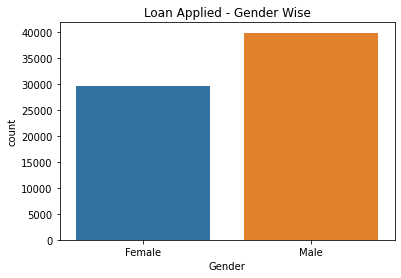

In [441]:
#Countplot- For Gender

sns.countplot(x ='Gender', data = df_train1)
plt.title('Loan Applied - Gender Wise')

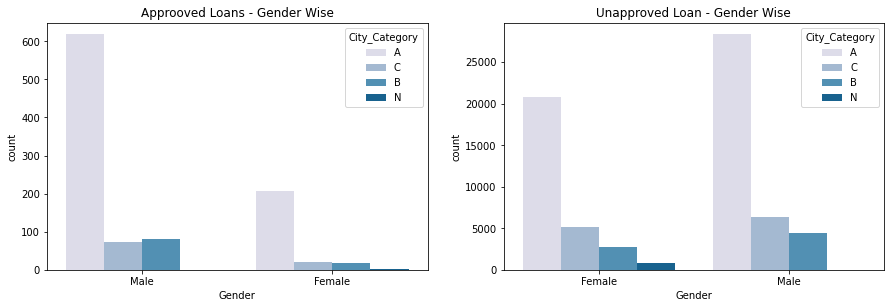

In [442]:
#Countplot- For Gender (When Loan is Approved and when Loan is Unapproved)

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
sns.countplot(x ='Gender', data = df_train1[df_train1['Approved']==1], palette = "PuBu",hue='City_Category')
plt.title('Approoved Loans - Gender Wise')

plt.subplot(2, 2, 2)
sns.countplot(x ='Gender', data = df_train1[df_train1['Approved']==0], palette = "PuBu",hue='City_Category')
plt.title('Unapproved Loan - Gender Wise')
plt.show()

## People from City category 'A' are applying most. Female are not getting loans in same ratio in which they are applying for loans.

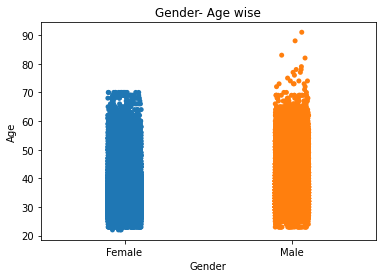

In [443]:
#Strip Plot -Gender & Age

sns.stripplot(x = "Gender", y = "Age", data = df_train1)
plt.title('Gender- Age wise')
plt.show()

### Male of higher ages are applying more than women

Text(0.5, 1.0, 'Loan Applied - Citywise')

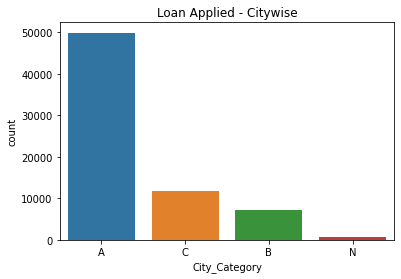

In [444]:
#Countplot- City category
sns.countplot(x ='City_Category', data = df_train1)
plt.title('Loan Applied - Citywise')

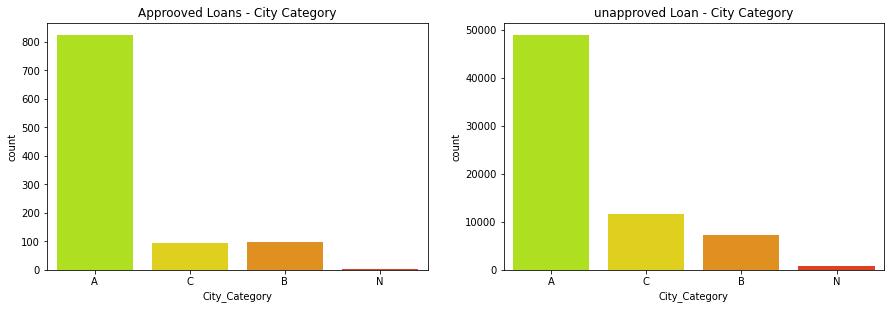

In [445]:
#Countplot- For City Category (When Loan is Approved and when Loan is Unapproved)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
sns.countplot(x ='City_Category', data = df_train1[df_train1['Approved']==1], palette = "prism_r")
plt.title('Approoved Loans - City Category')

plt.subplot(2, 2, 2)
sns.countplot(x ='City_Category', data = df_train1[df_train1['Approved']==0], palette = "prism_r")
plt.title('unapproved Loan - City Category')
plt.show()

Text(0.5, 1.0, 'Loan Applied - Employer Category')

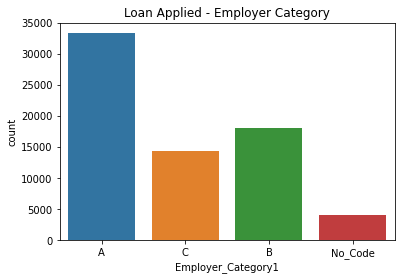

In [446]:
#Countplot- Employer Category1

sns.countplot(x ='Employer_Category1', data = df_train1)
plt.title('Loan Applied - Employer Category')

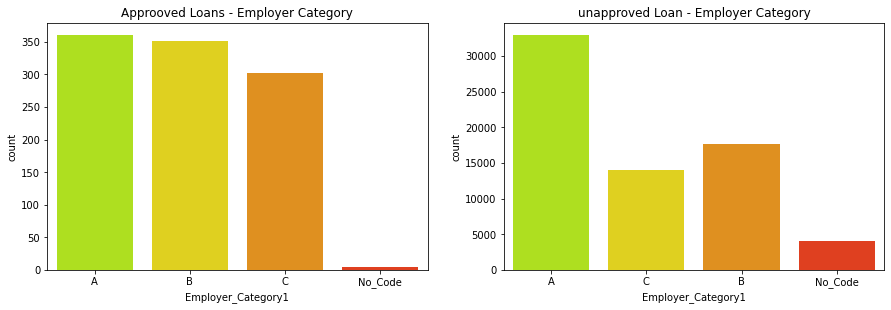

In [447]:
#Countplot- For City Category1 (When Loan is Approved and when Loan is Unapproved)

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
sns.countplot(x ='Employer_Category1', data = df_train1[df_train1['Approved']==1], palette = "prism_r")
plt.title('Approoved Loans - Employer Category')

plt.subplot(2, 2, 2)
sns.countplot(x ='Employer_Category1', data = df_train1[df_train1['Approved']==0], palette = "prism_r")
plt.title('unapproved Loan - Employer Category')
plt.show()

### People who are in class 'B' of Employer Category1 are applying less as compare to 'A' but getting loans in almost same numbers. Same thing is with class 'C'. It shows that class 'A' person have highest ratio in applying for loan but low ratio in getting loans.

Text(0.5, 1.0, 'Loan Applied - Employer Category2')

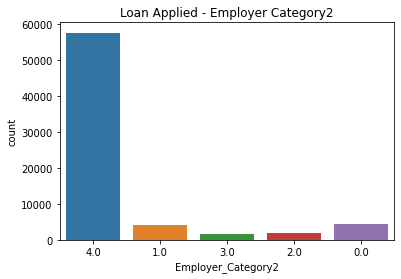

In [448]:
#Countplot- Employer Category2

sns.countplot(x ='Employer_Category2', data = df_train1)
plt.title('Loan Applied - Employer Category2')

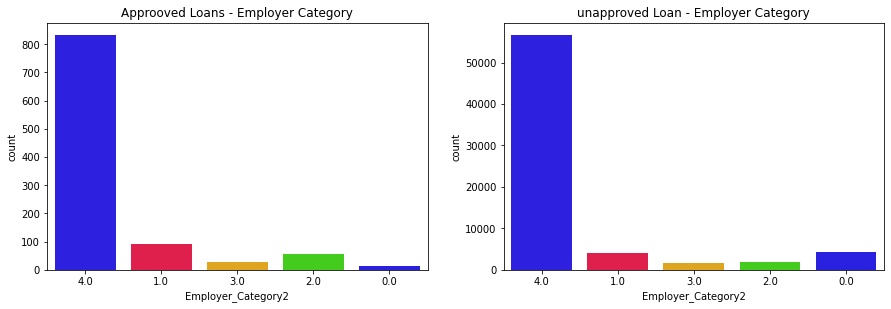

In [449]:
#Countplot- For Employer_Category2 (When Loan is Approved and when Loan is Unapproved)

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
sns.countplot(x ='Employer_Category2', data = df_train1[df_train1['Approved']==1], palette = "prism_r")
plt.title('Approoved Loans - Employer Category')

plt.subplot(2, 2, 2)
sns.countplot(x ='Employer_Category2', data = df_train1[df_train1['Approved']==0], palette = "prism_r")
plt.title('unapproved Loan - Employer Category')
plt.show()

## Outlier Removal

In [450]:
#Percentiles in train data
df_train1.describe(percentiles=[.25,.50,.75,.85,.90,.95,.99])

,DOB,Monthly_Income,Var1,Approved,Loan_Period_Miss,Interest_Rate_Miss,Loan_Amount,Loan_Period,Interest_Rate,Existing_EMI,EMI,Age,Lead_Month,Lead_Day
count,69713.0,69713.0,69713.0,69713.0,69713.0,69713.0,69713.0,69713.0,69713.0,69713.0,69713.0,69713.0,69713.0,69713.0
mean,1985.3,5622.3,3.9,0.0,0.4,0.7,41905.6,3.9,20.1,360.9,1227.9,35.7,8.1,16.0
std,7.1,174767.1,3.8,0.1,0.5,0.5,26141.8,0.9,4.7,2287.7,676.9,7.1,0.8,8.9
min,1930.0,0.0,0.0,0.0,0.0,0.0,5000.0,1.0,12.0,0.0,118.0,22.0,7.0,1.0
25%,1982.0,1650.0,0.0,0.0,0.0,0.0,20000.0,4.0,16.2,0.0,742.0,31.0,7.0,8.0
50%,1987.0,2500.0,2.0,0.0,0.0,1.0,40600.0,4.0,19.2,0.0,1163.0,34.0,8.0,16.0
75%,1990.0,4000.0,7.0,0.0,1.0,1.0,52400.0,4.0,23.9,350.0,1533.8,39.0,9.0,24.0
85%,1991.0,5100.0,10.0,0.0,1.0,1.0,52400.0,5.0,23.9,700.1,1533.8,42.0,9.0,27.0
90%,1992.0,6200.0,10.0,0.0,1.0,1.0,64000.0,5.0,24.0,1000.0,1808.0,45.0,9.0,28.0
95%,1993.0,9500.0,10.0,0.0,1.0,1.0,96000.0,5.0,28.9,1800.0,2367.0,50.0,9.0,30.0


In [451]:
df_train1.shape

(69713, 27)

In [452]:
#outlier removal from column' Monthly Income' - Train

Q1 = df_train1['Monthly_Income'].quantile(0.05)
Q3 = df_train1['Monthly_Income'].quantile(0.99)
IQR=Q3-Q1

df_train1= df_train1[(df_train1['Monthly_Income'] >= Q1) & (df_train1['Monthly_Income'] <= Q3)]

In [453]:
df_train1.shape

(66337, 27)

In [454]:
df_test1.shape

(30037, 26)

In [455]:
#Percentiles in Test Data
df_test1.describe(percentiles=[.25,.50,.75,.85,.90,.95,.99])

,DOB,Monthly_Income,Var1,Loan_Period_Miss,Interest_Rate_Miss,Loan_Amount,Loan_Period,Interest_Rate,Existing_EMI,EMI,Age,Lead_Month,Lead_Day
count,30037.0,30037.0,30037.0,30037.0,30037.0,30037.0,30037.0,30037.0,30037.0,30037.0,30037.0,30037.0,30037.0
mean,1985.3,3977.1,4.0,0.4,0.7,41954.2,3.9,20.1,348.8,1224.8,35.7,8.1,16.1
std,7.1,23289.6,3.8,0.5,0.5,25984.7,0.9,4.7,1000.3,665.7,7.1,0.8,8.9
min,1933.0,0.0,0.0,0.0,0.0,5000.0,1.0,12.0,0.0,118.0,22.0,7.0,1.0
25%,1982.0,1650.0,0.0,0.0,0.0,20200.0,4.0,16.2,0.0,740.2,31.0,7.0,8.0
50%,1987.0,2500.0,2.0,0.0,1.0,40600.0,4.0,19.2,0.0,1154.0,34.0,8.0,16.0
75%,1990.0,4000.0,7.0,1.0,1.0,52400.0,5.0,23.9,350.0,1533.8,39.0,9.0,24.0
85%,1991.0,5100.0,10.0,1.0,1.0,52400.0,5.0,23.9,700.0,1533.8,42.0,9.0,27.0
90%,1992.0,6238.5,10.0,1.0,1.0,64000.0,5.0,24.0,1000.0,1820.4,45.0,9.0,28.0
95%,1993.0,9300.0,10.0,1.0,1.0,96000.0,5.0,28.9,1800.0,2392.0,50.0,9.0,30.0


In [456]:
#outlier removal from column' Monthly Income' - Test

Q1 = df_test1['Monthly_Income'].quantile(0.05)
Q3 = df_test1['Monthly_Income'].quantile(0.99)
IQR=Q3-Q1

df_test1= df_test1[(df_test1['Monthly_Income'] >= Q1) & (df_test1['Monthly_Income'] <= Q3)]

In [457]:
df_test1.shape

(28597, 26)

In [458]:
#outlier removal from column' Age' - Train

Q1 = df_train1['Age'].quantile(0.05)
Q3 = df_train1['Age'].quantile(0.99)
IQR=Q3-Q1

df_train1= df_train1[(df_train1['Age'] >= Q1) & (df_train1['Age'] <= Q3)]

In [459]:
#outlier removal from column' Age' - Test

Q1 = df_test1['Age'].quantile(0.05)
Q3 = df_test1['Age'].quantile(0.99)
IQR=Q3-Q1

df_test1= df_test1[(df_test1['Age'] >= Q1) & (df_test1['Age'] <= Q3)]

In [460]:
df_train1.describe(percentiles=[.25,.50,.75,.85,.90,.95,.99])

,DOB,Monthly_Income,Var1,Approved,Loan_Period_Miss,Interest_Rate_Miss,Loan_Amount,Loan_Period,Interest_Rate,Existing_EMI,EMI,Age,Lead_Month,Lead_Day
count,63003.0,63003.0,63003.0,63003.0,63003.0,63003.0,63003.0,63003.0,63003.0,63003.0,63003.0,63003.0,63003.0,63003.0
mean,1985.0,3431.3,4.2,0.0,0.4,0.7,41507.8,3.9,19.9,358.8,1215.1,36.0,8.1,16.1
std,6.4,2897.9,3.8,0.1,0.5,0.5,25856.7,1.0,4.7,877.9,665.2,6.4,0.8,8.9
min,1961.0,1000.0,0.0,0.0,0.0,0.0,5000.0,1.0,12.0,0.0,118.0,28.0,7.0,1.0
25%,1982.0,1800.0,0.0,0.0,0.0,0.0,20000.0,4.0,16.0,0.0,740.2,31.0,7.0,8.0
50%,1987.0,2500.0,4.0,0.0,0.0,1.0,40000.0,4.0,18.9,0.0,1125.0,34.0,8.0,16.0
75%,1990.0,4000.0,7.0,0.0,1.0,1.0,52400.0,5.0,23.9,400.0,1533.8,39.0,9.0,24.0
85%,1991.0,5100.0,10.0,0.0,1.0,1.0,52400.0,5.0,23.9,779.3,1533.8,42.0,9.0,27.0
90%,1991.0,6100.0,10.0,0.0,1.0,1.0,64200.0,5.0,24.0,1050.0,1826.0,45.0,9.0,28.0
95%,1992.0,8800.0,10.0,0.0,1.0,1.0,96000.0,5.0,29.0,1855.7,2363.4,50.0,9.0,30.0


In [461]:
df_test1.describe(percentiles=[.25,.50,.75,.85,.90,.95,.99])

,DOB,Monthly_Income,Var1,Loan_Period_Miss,Interest_Rate_Miss,Loan_Amount,Loan_Period,Interest_Rate,Existing_EMI,EMI,Age,Lead_Month,Lead_Day
count,27143.0,27143.0,27143.0,27143.0,27143.0,27143.0,27143.0,27143.0,27143.0,27143.0,27143.0,27143.0,27143.0
mean,1985.0,3393.7,4.2,0.4,0.7,41460.4,3.9,19.9,352.1,1210.5,36.0,8.1,16.2
std,6.4,2773.1,3.8,0.5,0.5,25378.7,0.9,4.7,890.3,651.9,6.4,0.8,8.9
min,1961.0,1000.0,0.0,0.0,0.0,5000.0,1.0,12.0,0.0,118.0,28.0,7.0,1.0
25%,1982.0,1800.0,0.0,0.0,0.0,20000.0,4.0,16.0,0.0,740.2,31.0,7.0,8.0
50%,1987.0,2500.0,4.0,0.0,1.0,40000.0,4.0,18.9,0.0,1125.0,34.0,8.0,17.0
75%,1990.0,4000.0,7.0,1.0,1.0,52400.0,5.0,23.9,385.1,1533.8,39.0,9.0,24.0
85%,1991.0,5100.0,10.0,1.0,1.0,52400.0,5.0,23.9,750.0,1533.8,42.0,9.0,27.0
90%,1991.0,6000.0,10.0,1.0,1.0,65000.0,5.0,24.0,1000.0,1839.0,45.0,9.0,28.0
95%,1992.0,8500.0,10.0,1.0,1.0,95000.0,5.0,29.2,1800.0,2380.4,50.0,9.0,30.0


In [462]:
#Creating new column in which monthly income is divided into different buckets  - Train data

Category=pd.cut(df_train1.Monthly_Income,bins=[0,5000,10000,15000,20000,25000,30000],labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k'])

df_train1.insert(10,'Income_group', Category)

In [463]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63003 entries, 0 to 69712
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   'ID                                  63003 non-null  object        
 1   Gender                               63003 non-null  object        
 2   DOB                                  63003 non-null  int64         
 3   Lead_Creation_Date                   63003 non-null  datetime64[ns]
 4   City_Code                            63003 non-null  object        
 5   City_Category                        63003 non-null  object        
 6   Employer_Code                        63003 non-null  object        
 7   Employer_Category1                   63003 non-null  object        
 8   Employer_Category2                   63003 non-null  object        
 9   Monthly_Income                       63003 non-null  float64       
 10  Income_gro

In [464]:
#Creating new column in which monthly income is divided into different buckets  - Test Data

Category=pd.cut(df_test1.Monthly_Income,bins=[0,5000,10000,15000,20000,25000,30000],labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k'])

df_test1.insert(10,'Income_group', Category)

In [465]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63003 entries, 0 to 69712
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   'ID                                  63003 non-null  object        
 1   Gender                               63003 non-null  object        
 2   DOB                                  63003 non-null  int64         
 3   Lead_Creation_Date                   63003 non-null  datetime64[ns]
 4   City_Code                            63003 non-null  object        
 5   City_Category                        63003 non-null  object        
 6   Employer_Code                        63003 non-null  object        
 7   Employer_Category1                   63003 non-null  object        
 8   Employer_Category2                   63003 non-null  object        
 9   Monthly_Income                       63003 non-null  float64       
 10  Income_gro

In [466]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27143 entries, 0 to 30036
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   'ID                                  27143 non-null  object        
 1   Gender                               27143 non-null  object        
 2   DOB                                  27143 non-null  int64         
 3   Lead_Creation_Date                   27143 non-null  datetime64[ns]
 4   City_Code                            27143 non-null  object        
 5   City_Category                        27143 non-null  object        
 6   Employer_Code                        27143 non-null  object        
 7   Employer_Category1                   27143 non-null  object        
 8   Employer_Category2                   27143 non-null  object        
 9   Monthly_Income                       27143 non-null  float64       
 10  Income_gro

Text(0.5, 1.0, 'Applied Loans - Income Wise')

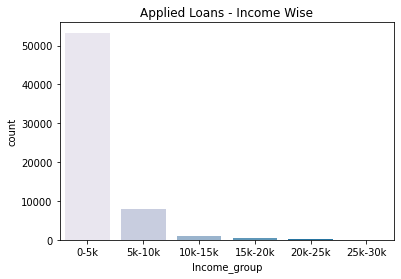

In [467]:
#Loans Applied- Income wise
sns.countplot(x ='Income_group', data = df_train1, palette = "PuBu")
plt.title('Applied Loans - Income Wise')

### people with salary in range bw 0-5k applied most.

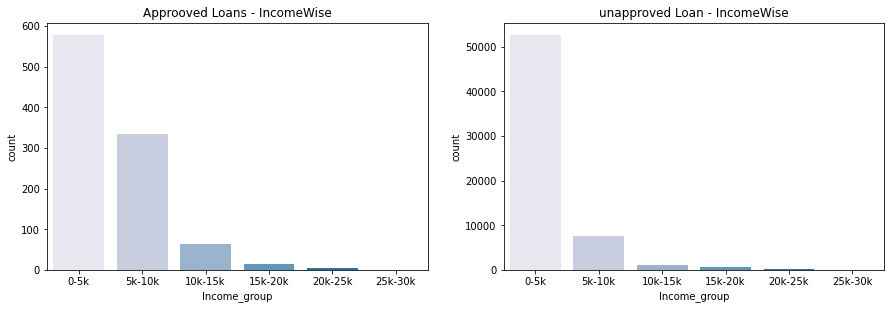

In [468]:
##Countplot- For Income Group (When Loan is Approved and when Loan is Unapproved)

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
sns.countplot(x ='Income_group', data = df_train1[df_train1['Approved']==1], palette = "PuBu")
plt.title('Approoved Loans - IncomeWise')

plt.subplot(2, 2, 2)
sns.countplot(x ='Income_group', data = df_train1[df_train1['Approved']==0], palette = "PuBu")
plt.title('unapproved Loan - IncomeWise')
plt.show()

### 5k-10k people applied less but their ratio of approval is higher . Same thing is with other higher income group. It means higher income groups are tends to get more loan approval. 

Text(0.5, 1.0, 'Loan Applied - Income Wise & Hue= Gender')

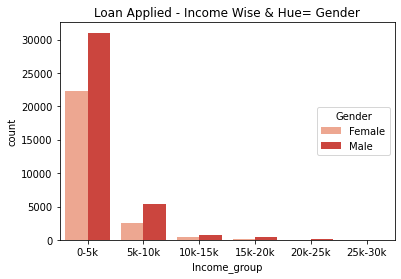

In [469]:
#Income group - Gender wise
sns.countplot(x ='Income_group', data = df_train1,palette = "Reds",hue="Gender")
plt.legend(loc='center right', title='Gender')
plt.title('Loan Applied - Income Wise & Hue= Gender')

### Male applied more than female

Text(0.5, 1.0, 'Loan Applied - Income Wise & Hue= City Category')

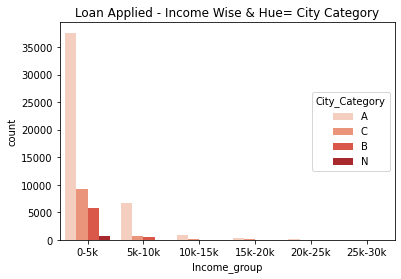

In [470]:
##Income group - City CategoryWise

sns.countplot(x ='Income_group', data = df_train1, palette = "Reds",hue="City_Category")
plt.legend(loc='center right', title='City_Category')
plt.title('Loan Applied - Income Wise & Hue= City Category')

### People with city category 'A' has applied most

Text(0.5, 1.0, 'Loan Applied - Income Wise & Hue= City Category')

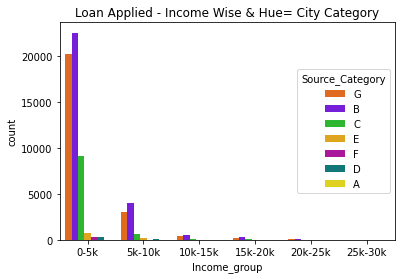

In [471]:
##Income group - City CategoryWise

sns.countplot(x ='Income_group', data = df_train1, palette = "prism_r",hue="Source_Category")
plt.legend(loc='center right', title='Source_Category')
plt.title('Loan Applied - Income Wise & Hue= City Category')

### Most of the people who have applied for loan are from source 'B' and 'G'.


Text(0.5, 1.0, 'Loan Applied - IncomeWise')

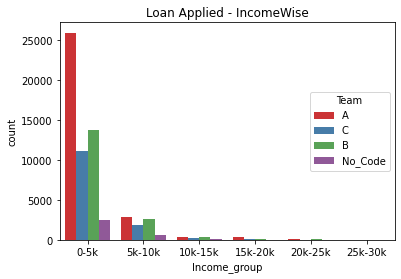

In [472]:
#Income group & Employer Category 1
sns.countplot(x ='Income_group', data = df_train1, palette = "Set1",hue="Employer_Category1")
plt.legend(loc='center right', title='Team')
plt.title('Loan Applied - IncomeWise')

### Employer category 'A' applied most and most of thenm earn in range b/w 0-5k

In [473]:
#Primary Bank type- Value_Counts

df_train1['Primary_Bank_Type'].value_counts(normalize=True,dropna=False)

P    0.6
G    0.3
BN   0.1
Name: Primary_Bank_Type, dtype: float64

Text(0.5, 1.0, 'Applied Loans - Bank Type')

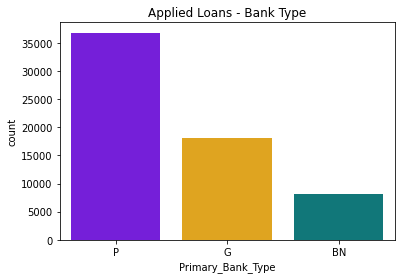

In [474]:
#CountPlot- Primary_Bank_Type

sns.countplot(x ='Primary_Bank_Type', data = df_train1, palette = "prism_r")
plt.title('Applied Loans - Bank Type')

### Around 8000 peole have not mentioned their bank type. This indicates maybe they dont have account.

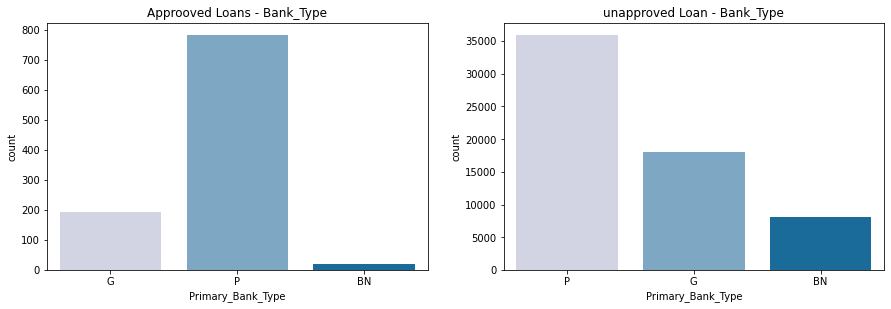

In [475]:
##Countplot- For Primary_Bank_Type (When Loan is Approved and when Loan is Unapproved)

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
sns.countplot(x ='Primary_Bank_Type', data = df_train1[df_train1['Approved']==1], palette = "PuBu")
plt.title('Approoved Loans - Bank_Type')

plt.subplot(2, 2, 2)
sns.countplot(x ='Primary_Bank_Type', data = df_train1[df_train1['Approved']==0], palette = "PuBu")
plt.title('unapproved Loan - Bank_Type')
plt.show()

### Very few people who hasn't mentioned their bank received loans

Text(0.5, 1.0, 'Loan Applied - IncomeWise')

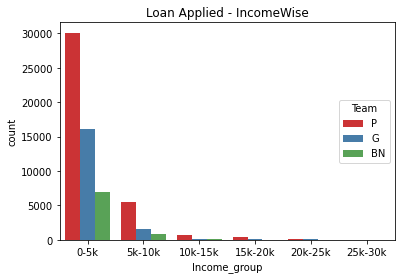

In [476]:
#Income group & Bank Type
sns.countplot(x ='Income_group', data = df_train1, palette = "Set1",hue="Primary_Bank_Type")
plt.legend(loc='center right', title='Team')
plt.title('Loan Applied - IncomeWise')

### Most of people who hasn't mentioned their bank are low income group people. It further indicates that maybe these people dont have bank accounts.

Text(0.5, 1.0, 'Applied Loans - Bank Type')

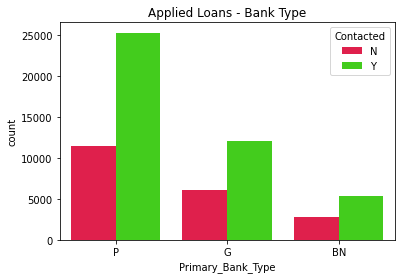

In [477]:
#Primary_Bank_Type & Contacted
sns.countplot(x ='Primary_Bank_Type', data = df_train1, palette = "prism_r",hue="Contacted")
plt.title('Applied Loans - Bank Type')

Text(0.5, 1.0, 'Applied Loans - Contacted')

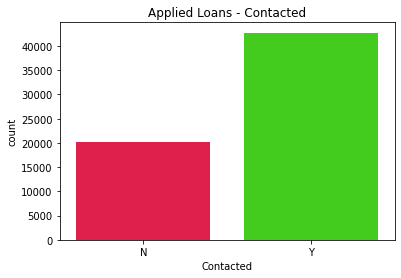

In [478]:
#Countplot Contacted
sns.countplot(x ='Contacted', data = df_train1, palette = "prism_r")
plt.title('Applied Loans - Contacted')

Text(0.5, 1.0, 'Applied Loans - Source_Category')

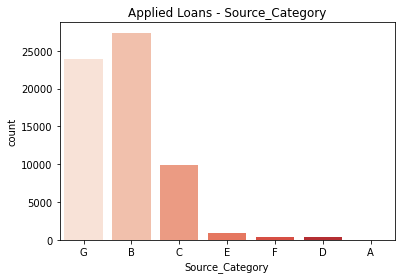

In [479]:
#Countplot- Source_Category
sns.countplot(x ='Source_Category', data = df_train1, palette = "Reds")
plt.title('Applied Loans - Source_Category')

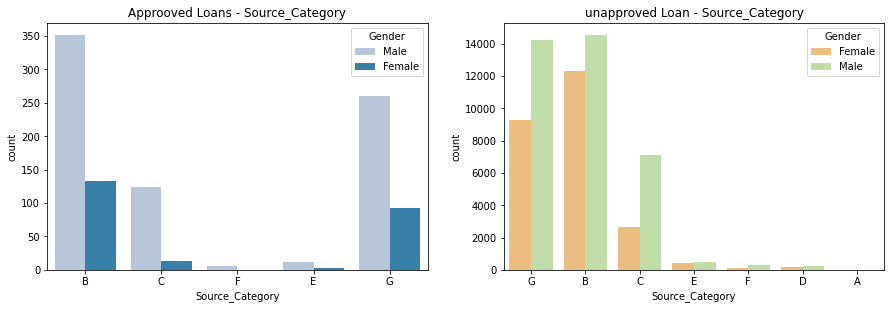

In [480]:
##Countplot- For Source Category (When Loan is Approved and when Loan is Unapproved)

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
sns.countplot(x ='Source_Category', data = df_train1[df_train1['Approved']==1], palette = "PuBu",hue="Gender")
plt.title('Approoved Loans - Source_Category')

plt.subplot(2, 2, 2)
sns.countplot(x ='Source_Category', data = df_train1[df_train1['Approved']==0], palette = "Spectral",hue="Gender")
plt.title('unapproved Loan - Source_Category')
plt.show()

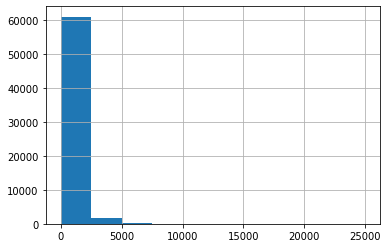

In [481]:
#Histogram of existing_Emi
df_train1.Existing_EMI.hist(label='Existing_EMI')

### Most Emi's are in range 0 to 5k

Text(0.5, 1.0, 'Applied Loans - Var1')

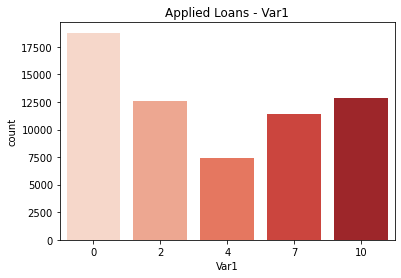

In [482]:
#Countplot- Var1
sns.countplot(x ='Var1', data = df_train1, palette = "Reds")
plt.title('Applied Loans - Var1')

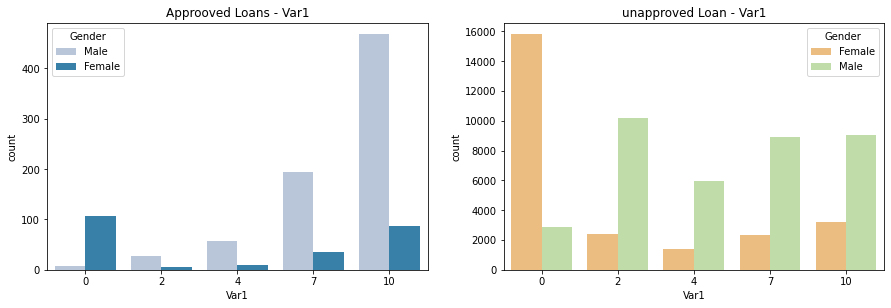

In [483]:
##Countplot- For Var1 (When Loan is Approved and when Loan is Unapproved)

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
sns.countplot(x ='Var1', data = df_train1[df_train1['Approved']==1], palette = "PuBu",hue="Gender")
plt.title('Approoved Loans - Var1')

plt.subplot(2, 2, 2)
sns.countplot(x ='Var1', data = df_train1[df_train1['Approved']==0], palette = "Spectral",hue="Gender")
plt.title('unapproved Loan - Var1')
plt.show()

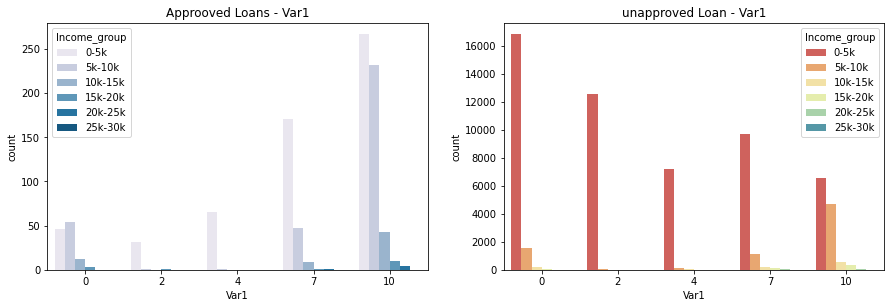

In [484]:
##Countplot- For Var1 (When Loan is Approved and when Loan is Unapproved)

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
sns.countplot(x ='Var1', data = df_train1[df_train1['Approved']==1], palette = "PuBu",hue="Income_group")
plt.title('Approoved Loans - Var1')

plt.subplot(2, 2, 2)
sns.countplot(x ='Var1', data = df_train1[df_train1['Approved']==0], palette = "Spectral",hue="Income_group")
plt.title('unapproved Loan - Var1')
plt.show()

### People with '10' Var1 are selecting more loans as compare to '0' who have applied the most

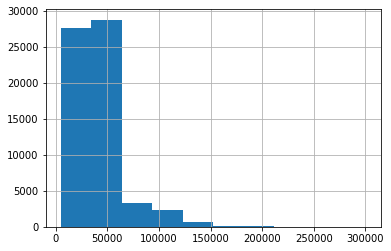

In [485]:
#Histogram- Loan_Amount

df_train1.Loan_Amount.hist(label='Loan_Amount')

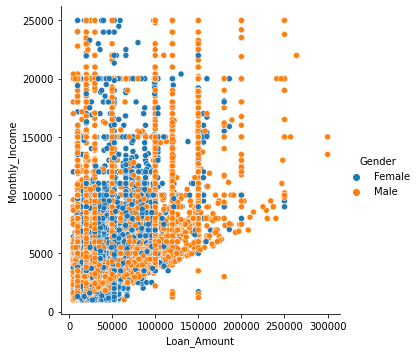

In [486]:
#Relplot- Loan Amount & monthly_Income

sns.relplot(x='Loan_Amount',y='Monthly_Income',data=df_train1,hue="Gender")


#### Few women have applied for high loan amount

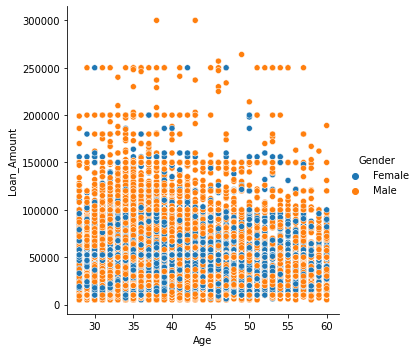

In [487]:
#Relplot- Loan Amount & monthly_Income

sns.relplot(x='Age',y='Loan_Amount',data=df_train1,hue="Gender")

#### In higher age group Male applied more than females

Text(0.5, 1.0, 'Applied Loans - Loan_Period')

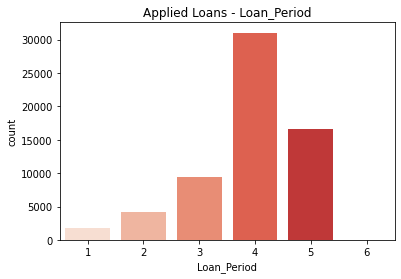

In [488]:
#Countplot- loan Period

sns.countplot(x ='Loan_Period', data = df_train1, palette = "Reds")
plt.title('Applied Loans - Loan_Period')

#### Maximum people applied for 4 years loan period

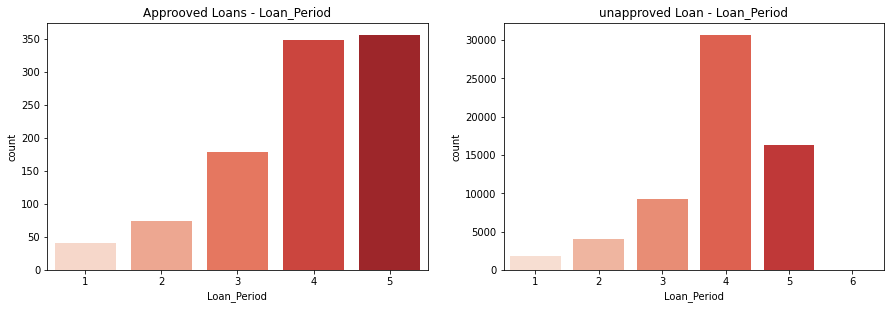

In [489]:
##Countplot- For Var1 (When Loan is Approved and when Loan is Unapproved)

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
sns.countplot(x ='Loan_Period', data = df_train1[df_train1['Approved']==1], palette = "Reds")
plt.title('Approoved Loans - Loan_Period')

plt.subplot(2, 2, 2)
sns.countplot(x ='Loan_Period', data = df_train1[df_train1['Approved']==0], palette = "Reds")
plt.title('unapproved Loan - Loan_Period')
plt.show()

#### More loans are given to people who wants loan for more years .People who wants loan for 5 years are getting loans in higher number as compare to people who wants loan for 4 years.

In [490]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63003 entries, 0 to 69712
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   'ID                                  63003 non-null  object        
 1   Gender                               63003 non-null  object        
 2   DOB                                  63003 non-null  int64         
 3   Lead_Creation_Date                   63003 non-null  datetime64[ns]
 4   City_Code                            63003 non-null  object        
 5   City_Category                        63003 non-null  object        
 6   Employer_Code                        63003 non-null  object        
 7   Employer_Category1                   63003 non-null  object        
 8   Employer_Category2                   63003 non-null  object        
 9   Monthly_Income                       63003 non-null  float64       
 10  Income_gro

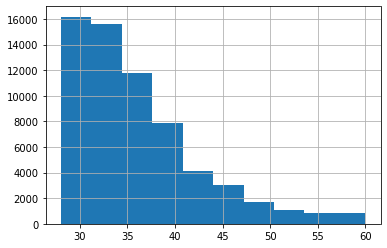

In [491]:
df_train1.Age.hist(label='Age')

#### People in range of 30 to 35 years are applying for loan the most.

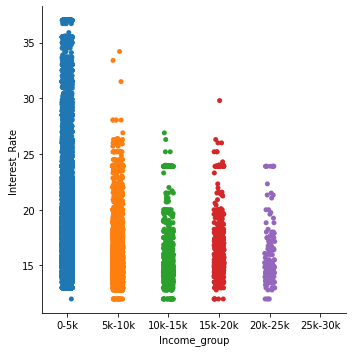

In [492]:
sns.catplot(x="Income_group", y="Interest_Rate", data=df_train1)

#### People from lower income group are getting higher interest rates.

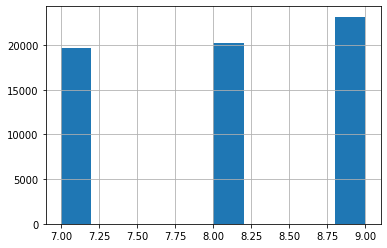

In [493]:
#Histogram - Lead Month
df_train1.Lead_Month.hist(label='Lead_Month')

#### Max leads came from 'September'

Text(0.5, 1.0, 'Applied Loans -  Lead_Generation_Day')

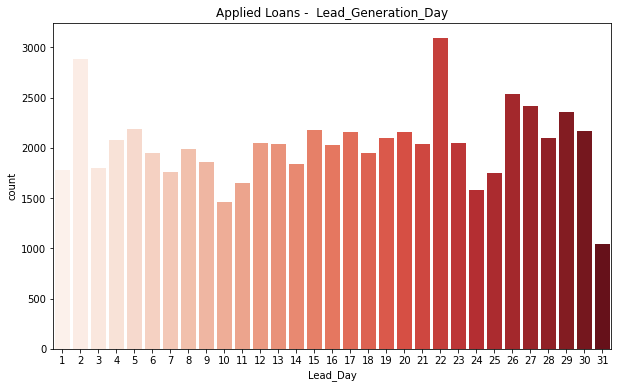

In [494]:
#Countplot- loan Period

plt.figure(figsize=(10,6))
sns.countplot(x ='Lead_Day', data = df_train1, palette = "Reds")
plt.title('Applied Loans -  Lead_Generation_Day')

In [495]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63003 entries, 0 to 69712
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   'ID                                  63003 non-null  object        
 1   Gender                               63003 non-null  object        
 2   DOB                                  63003 non-null  int64         
 3   Lead_Creation_Date                   63003 non-null  datetime64[ns]
 4   City_Code                            63003 non-null  object        
 5   City_Category                        63003 non-null  object        
 6   Employer_Code                        63003 non-null  object        
 7   Employer_Category1                   63003 non-null  object        
 8   Employer_Category2                   63003 non-null  object        
 9   Monthly_Income                       63003 non-null  float64       
 10  Income_gro

In [496]:
df_train1.shape

(63003, 28)

In [497]:
#Dropping few variables- Train Dataset

df_train1.drop(['DOB','Lead_Creation_Date'],axis=1,inplace=True)

In [498]:
#Dropping few variables- Test Dataset

df_test1.drop(['DOB','Lead_Creation_Date'],axis=1,inplace=True)

In [499]:
#copy ''ID' in series aand save it for further use

id_train=df_train1.pop("'ID")

id_test=df_test1.pop("'ID")

In [500]:
#Dropping few variables- Train & Test Dataset

df_train1.drop(['Income_group'],axis=1,inplace=True)

df_test1.drop(['Income_group'],axis=1,inplace=True)

In [501]:
#Shape

df_train1.shape

df_test1.shape

(27143, 23)

In [502]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63003 entries, 0 to 69712
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Gender                               63003 non-null  object 
 1   City_Code                            63003 non-null  object 
 2   City_Category                        63003 non-null  object 
 3   Employer_Code                        63003 non-null  object 
 4   Employer_Category1                   63003 non-null  object 
 5   Employer_Category2                   63003 non-null  object 
 6   Monthly_Income                       63003 non-null  float64
 7   Customer_Existing_Primary_Bank_Code  63003 non-null  object 
 8   Primary_Bank_Type                    63003 non-null  object 
 9   Contacted                            63003 non-null  object 
 10  Source                               63003 non-null  object 
 11  Source_Category             

# Dummy Variables

#### Gender

In [503]:
##Gender Variables

df_train1['Gender'] = df_train1.Gender.map({'Male': 0, 'Female': 1})

df_test1['Gender'] = df_test1.Gender.map({'Male': 0, 'Female': 1})

#### City Code

In [504]:
frequency_city1 = dict(df_train1["City_Code"].value_counts(normalize=True))  
df_train1["City_Code_freq"] = df_train1["City_Code"].map(lambda x: frequency_city1[x])

In [505]:
frequency_city2 = dict(df_test1["City_Code"].value_counts(normalize=True))  
df_test1["City_Code_freq"] = df_test1["City_Code"].map(lambda x: frequency_city2[x])

In [506]:
df_train1.head()

,Gender,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Var1,Approved,Loan_Period_Miss,Interest_Rate_Miss,Loan_Amount,Loan_Period,Interest_Rate,Existing_EMI,EMI,Age,Lead_Month,Lead_Day,City_Code_freq
0,1,C10001,A,COM0044082,A,4.0,2000.0,B001,P,N,S122,G,0,0,1,1,52400.0,4,23.9,0.0,1533.8,42,7,15,0.1
1,0,C10003,A,COM0000002,C,1.0,3500.0,B002,P,Y,S122,G,10,0,0,0,20000.0,2,13.2,0.0,953.0,35,7,4,0.1
2,0,C10125,C,COM0005267,C,4.0,2250.0,B003,G,Y,S143,B,0,0,0,1,45000.0,4,17.9,0.0,1323.2,39,7,19,0.0
3,0,C10477,C,COM0004143,A,4.0,3500.0,B003,G,Y,S143,B,7,0,0,1,92000.0,5,19.3,0.0,2402.0,32,7,9,0.0
4,0,C10002,A,COM0001781,A,4.0,10000.0,B001,P,Y,S134,B,10,0,0,1,50000.0,2,15.2,2500.0,1302.6,36,7,20,0.1


In [507]:
df_train1.drop(['City_Code'],axis=1,inplace=True)

df_test1.drop(['City_Code'],axis=1,inplace=True)

#### City_Category

In [508]:
dummies = pd.get_dummies(df_train1['City_Category'],prefix='City_Category', drop_first=False)
df_train1.drop(['City_Category'],axis=1,inplace=True)
df_train1=pd.concat([df_train1, dummies], axis=1)

In [509]:
dummies = pd.get_dummies(df_test1['City_Category'],prefix='City_Category', drop_first=False)
df_test1.drop(['City_Category'],axis=1,inplace=True)
df_test1=pd.concat([df_test1, dummies], axis=1)

In [510]:
df_train1.head()

,Gender,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Var1,Approved,Loan_Period_Miss,Interest_Rate_Miss,Loan_Amount,Loan_Period,Interest_Rate,Existing_EMI,EMI,Age,Lead_Month,Lead_Day,City_Code_freq,City_Category_A,City_Category_B,City_Category_C,City_Category_N
0,1,COM0044082,A,4.0,2000.0,B001,P,N,S122,G,0,0,1,1,52400.0,4,23.9,0.0,1533.8,42,7,15,0.1,1,0,0,0
1,0,COM0000002,C,1.0,3500.0,B002,P,Y,S122,G,10,0,0,0,20000.0,2,13.2,0.0,953.0,35,7,4,0.1,1,0,0,0
2,0,COM0005267,C,4.0,2250.0,B003,G,Y,S143,B,0,0,0,1,45000.0,4,17.9,0.0,1323.2,39,7,19,0.0,0,0,1,0
3,0,COM0004143,A,4.0,3500.0,B003,G,Y,S143,B,7,0,0,1,92000.0,5,19.3,0.0,2402.0,32,7,9,0.0,0,0,1,0
4,0,COM0001781,A,4.0,10000.0,B001,P,Y,S134,B,10,0,0,1,50000.0,2,15.2,2500.0,1302.6,36,7,20,0.1,1,0,0,0


#### Employer Code

In [511]:
frequency_employer1 = dict(df_train1["Employer_Code"].value_counts(normalize=True))  
df_train1["Employer_Code_freq"] = df_train1["Employer_Code"].map(lambda x: frequency_employer1[x])

In [512]:
frequency_employer2 = dict(df_test1["Employer_Code"].value_counts(normalize=True))  
df_test1["Employer_Code_freq"] = df_test1["Employer_Code"].map(lambda x: frequency_employer2[x])

In [513]:
df_train1.drop(['Employer_Code'],axis=1,inplace=True)

df_test1.drop(['Employer_Code'],axis=1,inplace=True)

#### Employer_Category1

In [514]:
dummies = pd.get_dummies(df_train1['Employer_Category1'],prefix='Employer_Category_', drop_first=False)
df_train1.drop(['Employer_Category1'],axis=1,inplace=True)
df_train1=pd.concat([df_train1, dummies], axis=1)

In [515]:
dummies = pd.get_dummies(df_test1['Employer_Category1'],prefix='Employer_Category_', drop_first=False)
df_test1.drop(['Employer_Category1'],axis=1,inplace=True)
df_test1=pd.concat([df_test1, dummies], axis=1)

In [516]:
df_train1.head()

,Gender,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Var1,Approved,Loan_Period_Miss,Interest_Rate_Miss,Loan_Amount,Loan_Period,Interest_Rate,Existing_EMI,EMI,Age,Lead_Month,Lead_Day,City_Code_freq,City_Category_A,City_Category_B,City_Category_C,City_Category_N,Employer_Code_freq,Employer_Category__A,Employer_Category__B,Employer_Category__C,Employer_Category__No_Code
0,1,4.0,2000.0,B001,P,N,S122,G,0,0,1,1,52400.0,4,23.9,0.0,1533.8,42,7,15,0.1,1,0,0,0,0.0,1,0,0,0
1,0,1.0,3500.0,B002,P,Y,S122,G,10,0,0,0,20000.0,2,13.2,0.0,953.0,35,7,4,0.1,1,0,0,0,0.0,0,0,1,0
2,0,4.0,2250.0,B003,G,Y,S143,B,0,0,0,1,45000.0,4,17.9,0.0,1323.2,39,7,19,0.0,0,0,1,0,0.0,0,0,1,0
3,0,4.0,3500.0,B003,G,Y,S143,B,7,0,0,1,92000.0,5,19.3,0.0,2402.0,32,7,9,0.0,0,0,1,0,0.0,1,0,0,0
4,0,4.0,10000.0,B001,P,Y,S134,B,10,0,0,1,50000.0,2,15.2,2500.0,1302.6,36,7,20,0.1,1,0,0,0,0.0,1,0,0,0


#### Customer_Existing_Primary_Bank_Code

In [517]:
frequency_Bank1 = dict(df_train1["Customer_Existing_Primary_Bank_Code"].value_counts(normalize=True))  
df_train1["Bank_code_freq"] = df_train1["Customer_Existing_Primary_Bank_Code"].map(lambda x: frequency_Bank1[x])

In [518]:
frequency_Bank2 = dict(df_test1["Customer_Existing_Primary_Bank_Code"].value_counts(normalize=True))  
df_test1["Bank_code_freq"] = df_test1["Customer_Existing_Primary_Bank_Code"].map(lambda x: frequency_Bank2[x])

In [519]:
df_train1.drop(['Customer_Existing_Primary_Bank_Code'],axis=1,inplace=True)

df_test1.drop(['Customer_Existing_Primary_Bank_Code'],axis=1,inplace=True)

#### Primary_Bank_Type

In [520]:
dummies = pd.get_dummies(df_train1['Primary_Bank_Type'],prefix='Primary_Bank_Category_', drop_first=False)
df_train1.drop(['Primary_Bank_Type'],axis=1,inplace=True)
df_train1=pd.concat([df_train1, dummies], axis=1)

In [521]:
dummies = pd.get_dummies(df_test1['Primary_Bank_Type'],prefix='Primary_Bank_Category_', drop_first=False)
df_test1.drop(['Primary_Bank_Type'],axis=1,inplace=True)
df_test1=pd.concat([df_test1, dummies], axis=1)

#### Contacted

In [522]:
dummies = pd.get_dummies(df_train1['Contacted'],prefix='Contacted_Category_', drop_first=False)
df_train1.drop(['Contacted'],axis=1,inplace=True)
df_train1=pd.concat([df_train1, dummies], axis=1)

In [523]:
dummies = pd.get_dummies(df_test1['Contacted'],prefix='Contacted_Category_', drop_first=False)
df_test1.drop(['Contacted'],axis=1,inplace=True)
df_test1=pd.concat([df_test1, dummies], axis=1)

In [524]:
df_train1.head()

,Gender,Employer_Category2,Monthly_Income,Source,Source_Category,Var1,Approved,Loan_Period_Miss,Interest_Rate_Miss,Loan_Amount,Loan_Period,Interest_Rate,Existing_EMI,EMI,Age,Lead_Month,Lead_Day,City_Code_freq,City_Category_A,City_Category_B,City_Category_C,City_Category_N,Employer_Code_freq,Employer_Category__A,Employer_Category__B,Employer_Category__C,Employer_Category__No_Code,Bank_code_freq,Primary_Bank_Category__BN,Primary_Bank_Category__G,Primary_Bank_Category__P,Contacted_Category__N,Contacted_Category__Y
0,1,4.0,2000.0,S122,G,0,0,1,1,52400.0,4,23.9,0.0,1533.8,42,7,15,0.1,1,0,0,0,0.0,1,0,0,0,0.2,0,0,1,1,0
1,0,1.0,3500.0,S122,G,10,0,0,0,20000.0,2,13.2,0.0,953.0,35,7,4,0.1,1,0,0,0,0.0,0,0,1,0,0.2,0,0,1,0,1
2,0,4.0,2250.0,S143,B,0,0,0,1,45000.0,4,17.9,0.0,1323.2,39,7,19,0.0,0,0,1,0,0.0,0,0,1,0,0.1,0,1,0,0,1
3,0,4.0,3500.0,S143,B,7,0,0,1,92000.0,5,19.3,0.0,2402.0,32,7,9,0.0,0,0,1,0,0.0,1,0,0,0,0.1,0,1,0,0,1
4,0,4.0,10000.0,S134,B,10,0,0,1,50000.0,2,15.2,2500.0,1302.6,36,7,20,0.1,1,0,0,0,0.0,1,0,0,0,0.2,0,0,1,0,1


#### Source

In [525]:
dummies = pd.get_dummies(df_train1['Source'],prefix='Source_', drop_first=False)
df_train1.drop(['Source'],axis=1,inplace=True)
df_train1=pd.concat([df_train1, dummies], axis=1)

In [526]:
dummies = pd.get_dummies(df_test1['Source'],prefix='Source_', drop_first=False)
df_test1.drop(['Source'],axis=1,inplace=True)
df_test1=pd.concat([df_test1, dummies], axis=1)

#### Source Category

In [527]:
dummies = pd.get_dummies(df_train1['Source_Category'],prefix='Source_Category_', drop_first=False)
df_train1.drop(['Source_Category'],axis=1,inplace=True)
df_train1=pd.concat([df_train1, dummies], axis=1)

In [528]:
dummies = pd.get_dummies(df_test1['Source_Category'],prefix='Source_Category_', drop_first=False)
df_test1.drop(['Source_Category'],axis=1,inplace=True)
df_test1=pd.concat([df_test1, dummies], axis=1)

#### Lead Month

In [529]:
dummies = pd.get_dummies(df_train1['Lead_Month'],prefix='Lead_Month_Category_', drop_first=False)
df_train1.drop(['Lead_Month'],axis=1,inplace=True)
df_train1=pd.concat([df_train1, dummies], axis=1)

In [530]:
dummies = pd.get_dummies(df_test1['Lead_Month'],prefix='Lead_Month_Category_', drop_first=False)
df_test1.drop(['Lead_Month'],axis=1,inplace=True)
df_test1=pd.concat([df_test1, dummies], axis=1)

In [531]:
df_train1.head()

,Gender,Employer_Category2,Monthly_Income,Var1,Approved,Loan_Period_Miss,Interest_Rate_Miss,Loan_Amount,Loan_Period,Interest_Rate,Existing_EMI,EMI,Age,Lead_Day,City_Code_freq,City_Category_A,City_Category_B,City_Category_C,City_Category_N,Employer_Code_freq,Employer_Category__A,Employer_Category__B,Employer_Category__C,Employer_Category__No_Code,Bank_code_freq,Primary_Bank_Category__BN,Primary_Bank_Category__G,Primary_Bank_Category__P,Contacted_Category__N,Contacted_Category__Y,Source__S122,Source__S123,Source__S124,Source__S127,Source__S129,Source__S130,Source__S133,Source__S134,Source__S135,Source__S136,Source__S137,Source__S138,Source__S139,Source__S140,Source__S141,Source__S143,Source__S144,Source__S150,Source__S151,Source__S153,Source__S154,Source__S155,Source__S156,Source__S157,Source__S158,Source__S159,Source__S160,Source__S161,Source__S162,Source_Category__A,Source_Category__B,Source_Category__C,Source_Category__D,Source_Category__E,Source_Category__F,Source_Category__G,Lead_Month_Category__7,Lead_Month_Category__8,Lead_Month_Category__9
0,1,4.0,2000.0,0,0,1,1,52400.0,4,23.9,0.0,1533.8,42,15,0.1,1,0,0,0,0.0,1,0,0,0,0.2,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,0,1.0,3500.0,10,0,0,0,20000.0,2,13.2,0.0,953.0,35,4,0.1,1,0,0,0,0.0,0,0,1,0,0.2,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,0,4.0,2250.0,0,0,0,1,45000.0,4,17.9,0.0,1323.2,39,19,0.0,0,0,1,0,0.0,0,0,1,0,0.1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,4.0,3500.0,7,0,0,1,92000.0,5,19.3,0.0,2402.0,32,9,0.0,0,0,1,0,0.0,1,0,0,0,0.1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0,4.0,10000.0,10,0,0,1,50000.0,2,15.2,2500.0,1302.6,36,20,0.1,1,0,0,0,0.0,1,0,0,0,0.2,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [532]:
df_test1.head()

,Gender,Employer_Category2,Monthly_Income,Var1,Loan_Period_Miss,Interest_Rate_Miss,Loan_Amount,Loan_Period,Interest_Rate,Existing_EMI,EMI,Age,Lead_Day,City_Code_freq,City_Category_A,City_Category_B,City_Category_C,City_Category_N,Employer_Code_freq,Employer_Category__A,Employer_Category__B,Employer_Category__C,Employer_Category__No_Code,Bank_code_freq,Primary_Bank_Category__BN,Primary_Bank_Category__G,Primary_Bank_Category__P,Contacted_Category__N,Contacted_Category__Y,Source__S122,Source__S123,Source__S124,Source__S127,Source__S129,Source__S131,Source__S132,Source__S133,Source__S134,Source__S136,Source__S137,Source__S138,Source__S141,Source__S142,Source__S143,Source__S144,Source__S150,Source__S151,Source__S153,Source__S155,Source__S156,Source__S157,Source__S158,Source__S159,Source__S161,Source__S162,Source_Category__A,Source_Category__B,Source_Category__C,Source_Category__D,Source_Category__E,Source_Category__F,Source_Category__G,Lead_Month_Category__7,Lead_Month_Category__8,Lead_Month_Category__9
0,0,4.0,2150.0,4,0,0,10000.0,3,20.0,0.0,372.0,33,5,0.0,0,0,1,0,0.0,1,0,0,0,0.2,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,4.0,4200.0,7,0,0,69000.0,5,24.0,0.0,1985.0,40,1,0.1,1,0,0,0,0.0,0,0,1,0,0.1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,1,4.0,1000.0,0,1,1,52400.0,4,23.9,0.0,1533.8,31,1,0.0,0,1,0,0,0.0,0,1,0,0,0.2,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1,3.0,1465.0,0,1,1,52400.0,4,23.9,0.0,1533.8,29,1,0.1,1,0,0,0,0.0,1,0,0,0,0.2,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,0,4.0,2340.0,0,0,1,10000.0,2,19.9,500.0,508.6,33,1,0.1,1,0,0,0,0.0,1,0,0,0,0.1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


### Label Encoding

#### 'Employer_Category2','Var1','Loan_Period_Miss','Interest_Rate_Miss','Lead_Day'

In [533]:
from sklearn.preprocessing import LabelEncoder

In [534]:
col=['Employer_Category2','Var1','Lead_Day']

In [535]:
df_train1[col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63003 entries, 0 to 69712
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Employer_Category2  63003 non-null  object
 1   Var1                63003 non-null  int64 
 2   Lead_Day            63003 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.4+ MB


In [536]:
df_test1[col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27143 entries, 0 to 30036
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Employer_Category2  27143 non-null  object
 1   Var1                27143 non-null  int64 
 2   Lead_Day            27143 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 848.2+ KB


In [537]:
#Converting Datatypes for train

df_train1['Employer_Category2']=df_train1['Employer_Category2'].astype('string')
df_train1['Var1']=df_train1['Var1'].astype('string')
df_train1['Lead_Day']=df_train1['Lead_Day'].astype('string')

In [538]:
#Converting Datatypes for test

df_test1['Employer_Category2']=df_test1['Employer_Category2'].astype('string')
df_test1['Var1']=df_test1['Var1'].astype('string')
df_test1['Lead_Day']=df_test1['Lead_Day'].astype('string')

In [539]:
df_train1[col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63003 entries, 0 to 69712
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Employer_Category2  63003 non-null  string
 1   Var1                63003 non-null  string
 2   Lead_Day            63003 non-null  string
dtypes: string(3)
memory usage: 4.4 MB


In [540]:
df_test1[col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27143 entries, 0 to 30036
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Employer_Category2  27143 non-null  string
 1   Var1                27143 non-null  string
 2   Lead_Day            27143 non-null  string
dtypes: string(3)
memory usage: 848.2 KB


In [541]:
#Label encoding of 'col' variables in train

for x in col:
    label_e = LabelEncoder()
    label_e.fit(df_train1[x])
    df_train1[x+'_label'] = label_e.transform(df_train1[x])
   

In [542]:
#Label encoding of 'col' variables in test

for y in col:
    label_e = LabelEncoder()
    label_e.fit(df_test1[y])
    df_test1[y+'_label'] = label_e.transform(df_test1[y])

In [543]:
df_train1.head()

,Gender,Employer_Category2,Monthly_Income,Var1,Approved,Loan_Period_Miss,Interest_Rate_Miss,Loan_Amount,Loan_Period,Interest_Rate,Existing_EMI,EMI,Age,Lead_Day,City_Code_freq,City_Category_A,City_Category_B,City_Category_C,City_Category_N,Employer_Code_freq,Employer_Category__A,Employer_Category__B,Employer_Category__C,Employer_Category__No_Code,Bank_code_freq,Primary_Bank_Category__BN,Primary_Bank_Category__G,Primary_Bank_Category__P,Contacted_Category__N,Contacted_Category__Y,Source__S122,Source__S123,Source__S124,Source__S127,Source__S129,Source__S130,Source__S133,Source__S134,Source__S135,Source__S136,Source__S137,Source__S138,Source__S139,Source__S140,Source__S141,Source__S143,Source__S144,Source__S150,Source__S151,Source__S153,Source__S154,Source__S155,Source__S156,Source__S157,Source__S158,Source__S159,Source__S160,Source__S161,Source__S162,Source_Category__A,Source_Category__B,Source_Category__C,Source_Category__D,Source_Category__E,Source_Category__F,Source_Category__G,Lead_Month_Category__7,Lead_Month_Category__8,Lead_Month_Category__9,Employer_Category2_label,Var1_label,Lead_Day_label
0,1,4.0,2000.0,0,0,1,1,52400.0,4,23.9,0.0,1533.8,42,15,0.1,1,0,0,0,0.0,1,0,0,0,0.2,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,4,0,6
1,0,1.0,3500.0,10,0,0,0,20000.0,2,13.2,0.0,953.0,35,4,0.1,1,0,0,0,0.0,0,0,1,0,0.2,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,25
2,0,4.0,2250.0,0,0,0,1,45000.0,4,17.9,0.0,1323.2,39,19,0.0,0,0,1,0,0.0,0,0,1,0,0.1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,4,0,10
3,0,4.0,3500.0,7,0,0,1,92000.0,5,19.3,0.0,2402.0,32,9,0.0,0,0,1,0,0.0,1,0,0,0,0.1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,4,4,30
4,0,4.0,10000.0,10,0,0,1,50000.0,2,15.2,2500.0,1302.6,36,20,0.1,1,0,0,0,0.0,1,0,0,0,0.2,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,4,1,12


In [544]:
df_test1.head()

,Gender,Employer_Category2,Monthly_Income,Var1,Loan_Period_Miss,Interest_Rate_Miss,Loan_Amount,Loan_Period,Interest_Rate,Existing_EMI,EMI,Age,Lead_Day,City_Code_freq,City_Category_A,City_Category_B,City_Category_C,City_Category_N,Employer_Code_freq,Employer_Category__A,Employer_Category__B,Employer_Category__C,Employer_Category__No_Code,Bank_code_freq,Primary_Bank_Category__BN,Primary_Bank_Category__G,Primary_Bank_Category__P,Contacted_Category__N,Contacted_Category__Y,Source__S122,Source__S123,Source__S124,Source__S127,Source__S129,Source__S131,Source__S132,Source__S133,Source__S134,Source__S136,Source__S137,Source__S138,Source__S141,Source__S142,Source__S143,Source__S144,Source__S150,Source__S151,Source__S153,Source__S155,Source__S156,Source__S157,Source__S158,Source__S159,Source__S161,Source__S162,Source_Category__A,Source_Category__B,Source_Category__C,Source_Category__D,Source_Category__E,Source_Category__F,Source_Category__G,Lead_Month_Category__7,Lead_Month_Category__8,Lead_Month_Category__9,Employer_Category2_label,Var1_label,Lead_Day_label
0,0,4.0,2150.0,4,0,0,10000.0,3,20.0,0.0,372.0,33,5,0.0,0,0,1,0,0.0,1,0,0,0,0.2,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,4,3,26
1,0,4.0,4200.0,7,0,0,69000.0,5,24.0,0.0,1985.0,40,1,0.1,1,0,0,0,0.0,0,0,1,0,0.1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,4,4,0
2,1,4.0,1000.0,0,1,1,52400.0,4,23.9,0.0,1533.8,31,1,0.0,0,1,0,0,0.0,0,1,0,0,0.2,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,4,0,0
3,1,3.0,1465.0,0,1,1,52400.0,4,23.9,0.0,1533.8,29,1,0.1,1,0,0,0,0.0,1,0,0,0,0.2,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,3,0,0
4,0,4.0,2340.0,0,0,1,10000.0,2,19.9,500.0,508.6,33,1,0.1,1,0,0,0,0.0,1,0,0,0,0.1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,4,0,0


In [545]:
#Dropping variables present in 'col'

df_train1.drop(col,axis=1,inplace=True)

df_test1.drop(col,axis=1,inplace=True)

In [546]:
df_train1.head()

,Gender,Monthly_Income,Approved,Loan_Period_Miss,Interest_Rate_Miss,Loan_Amount,Loan_Period,Interest_Rate,Existing_EMI,EMI,Age,City_Code_freq,City_Category_A,City_Category_B,City_Category_C,City_Category_N,Employer_Code_freq,Employer_Category__A,Employer_Category__B,Employer_Category__C,Employer_Category__No_Code,Bank_code_freq,Primary_Bank_Category__BN,Primary_Bank_Category__G,Primary_Bank_Category__P,Contacted_Category__N,Contacted_Category__Y,Source__S122,Source__S123,Source__S124,Source__S127,Source__S129,Source__S130,Source__S133,Source__S134,Source__S135,Source__S136,Source__S137,Source__S138,Source__S139,Source__S140,Source__S141,Source__S143,Source__S144,Source__S150,Source__S151,Source__S153,Source__S154,Source__S155,Source__S156,Source__S157,Source__S158,Source__S159,Source__S160,Source__S161,Source__S162,Source_Category__A,Source_Category__B,Source_Category__C,Source_Category__D,Source_Category__E,Source_Category__F,Source_Category__G,Lead_Month_Category__7,Lead_Month_Category__8,Lead_Month_Category__9,Employer_Category2_label,Var1_label,Lead_Day_label
0,1,2000.0,0,1,1,52400.0,4,23.9,0.0,1533.8,42,0.1,1,0,0,0,0.0,1,0,0,0,0.2,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,4,0,6
1,0,3500.0,0,0,0,20000.0,2,13.2,0.0,953.0,35,0.1,1,0,0,0,0.0,0,0,1,0,0.2,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,25
2,0,2250.0,0,0,1,45000.0,4,17.9,0.0,1323.2,39,0.0,0,0,1,0,0.0,0,0,1,0,0.1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,4,0,10
3,0,3500.0,0,0,1,92000.0,5,19.3,0.0,2402.0,32,0.0,0,0,1,0,0.0,1,0,0,0,0.1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,4,4,30
4,0,10000.0,0,0,1,50000.0,2,15.2,2500.0,1302.6,36,0.1,1,0,0,0,0.0,1,0,0,0,0.2,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,4,1,12


In [547]:
df_test1.head()

,Gender,Monthly_Income,Loan_Period_Miss,Interest_Rate_Miss,Loan_Amount,Loan_Period,Interest_Rate,Existing_EMI,EMI,Age,City_Code_freq,City_Category_A,City_Category_B,City_Category_C,City_Category_N,Employer_Code_freq,Employer_Category__A,Employer_Category__B,Employer_Category__C,Employer_Category__No_Code,Bank_code_freq,Primary_Bank_Category__BN,Primary_Bank_Category__G,Primary_Bank_Category__P,Contacted_Category__N,Contacted_Category__Y,Source__S122,Source__S123,Source__S124,Source__S127,Source__S129,Source__S131,Source__S132,Source__S133,Source__S134,Source__S136,Source__S137,Source__S138,Source__S141,Source__S142,Source__S143,Source__S144,Source__S150,Source__S151,Source__S153,Source__S155,Source__S156,Source__S157,Source__S158,Source__S159,Source__S161,Source__S162,Source_Category__A,Source_Category__B,Source_Category__C,Source_Category__D,Source_Category__E,Source_Category__F,Source_Category__G,Lead_Month_Category__7,Lead_Month_Category__8,Lead_Month_Category__9,Employer_Category2_label,Var1_label,Lead_Day_label
0,0,2150.0,0,0,10000.0,3,20.0,0.0,372.0,33,0.0,0,0,1,0,0.0,1,0,0,0,0.2,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,4,3,26
1,0,4200.0,0,0,69000.0,5,24.0,0.0,1985.0,40,0.1,1,0,0,0,0.0,0,0,1,0,0.1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,4,4,0
2,1,1000.0,1,1,52400.0,4,23.9,0.0,1533.8,31,0.0,0,1,0,0,0.0,0,1,0,0,0.2,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,4,0,0
3,1,1465.0,1,1,52400.0,4,23.9,0.0,1533.8,29,0.1,1,0,0,0,0.0,1,0,0,0,0.2,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,3,0,0
4,0,2340.0,0,1,10000.0,2,19.9,500.0,508.6,33,0.1,1,0,0,0,0.0,1,0,0,0,0.1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,4,0,0


In [548]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63003 entries, 0 to 69712
Data columns (total 69 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      63003 non-null  int64  
 1   Monthly_Income              63003 non-null  float64
 2   Approved                    63003 non-null  int64  
 3   Loan_Period_Miss            63003 non-null  int64  
 4   Interest_Rate_Miss          63003 non-null  int64  
 5   Loan_Amount                 63003 non-null  float64
 6   Loan_Period                 63003 non-null  int64  
 7   Interest_Rate               63003 non-null  float64
 8   Existing_EMI                63003 non-null  float64
 9   EMI                         63003 non-null  float64
 10  Age                         63003 non-null  int64  
 11  City_Code_freq              63003 non-null  float64
 12  City_Category_A             63003 non-null  uint8  
 13  City_Category_B             630

In [549]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27143 entries, 0 to 30036
Data columns (total 65 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      27143 non-null  int64  
 1   Monthly_Income              27143 non-null  float64
 2   Loan_Period_Miss            27143 non-null  int64  
 3   Interest_Rate_Miss          27143 non-null  int64  
 4   Loan_Amount                 27143 non-null  float64
 5   Loan_Period                 27143 non-null  int64  
 6   Interest_Rate               27143 non-null  float64
 7   Existing_EMI                27143 non-null  float64
 8   EMI                         27143 non-null  float64
 9   Age                         27143 non-null  int64  
 10  City_Code_freq              27143 non-null  float64
 11  City_Category_A             27143 non-null  uint8  
 12  City_Category_B             27143 non-null  uint8  
 13  City_Category_C             271

In [550]:
#Checking which columns are present in train but not present in test

li=[]
for x in df_train1.columns:
    if x not in df_test1.columns:
        li.append(x)

In [551]:
li

['Approved',
 'Source__S130',
 'Source__S135',
 'Source__S139',
 'Source__S140',
 'Source__S154',
 'Source__S160']

In [552]:
#Popping target variable to new series 'y'
y=df_train1.pop('Approved')

In [553]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Approved, dtype: int64

In [554]:
#Dropping extra columns from train

df_train1.drop([
 'Source__S130',
 'Source__S135',
 'Source__S139',
 'Source__S140',
 'Source__S154',
 'Source__S160'],axis=1,inplace=True)

In [555]:
df_train1.shape

(63003, 62)

In [556]:
#Checking which columns are present in test but not present in train

li=[]
for x in df_test1.columns:
    if x not in df_train1.columns:
        li.append(x)

In [557]:
li

['Source__S131', 'Source__S132', 'Source__S142']

In [558]:
df_test1.shape

(27143, 65)

In [559]:
#Dropping extra columns from test

df_test1.drop(['Source__S131', 'Source__S132', 'Source__S142'],axis=1,inplace=True)

In [560]:
df_test1.shape

(27143, 62)

In [561]:
train_col=df_train1.columns
train_col

Index(['Gender', 'Monthly_Income', 'Loan_Period_Miss', 'Interest_Rate_Miss',
       'Loan_Amount', 'Loan_Period', 'Interest_Rate', 'Existing_EMI', 'EMI',
       'Age', 'City_Code_freq', 'City_Category_A', 'City_Category_B',
       'City_Category_C', 'City_Category_N', 'Employer_Code_freq',
       'Employer_Category__A', 'Employer_Category__B', 'Employer_Category__C',
       'Employer_Category__No_Code', 'Bank_code_freq',
       'Primary_Bank_Category__BN', 'Primary_Bank_Category__G',
       'Primary_Bank_Category__P', 'Contacted_Category__N',
       'Contacted_Category__Y', 'Source__S122', 'Source__S123', 'Source__S124',
       'Source__S127', 'Source__S129', 'Source__S133', 'Source__S134',
       'Source__S136', 'Source__S137', 'Source__S138', 'Source__S141',
       'Source__S143', 'Source__S144', 'Source__S150', 'Source__S151',
       'Source__S153', 'Source__S155', 'Source__S156', 'Source__S157',
       'Source__S158', 'Source__S159', 'Source__S161', 'Source__S162',
       'Source_C

In [562]:
test_col=df_test1.columns
test_col

Index(['Gender', 'Monthly_Income', 'Loan_Period_Miss', 'Interest_Rate_Miss',
       'Loan_Amount', 'Loan_Period', 'Interest_Rate', 'Existing_EMI', 'EMI',
       'Age', 'City_Code_freq', 'City_Category_A', 'City_Category_B',
       'City_Category_C', 'City_Category_N', 'Employer_Code_freq',
       'Employer_Category__A', 'Employer_Category__B', 'Employer_Category__C',
       'Employer_Category__No_Code', 'Bank_code_freq',
       'Primary_Bank_Category__BN', 'Primary_Bank_Category__G',
       'Primary_Bank_Category__P', 'Contacted_Category__N',
       'Contacted_Category__Y', 'Source__S122', 'Source__S123', 'Source__S124',
       'Source__S127', 'Source__S129', 'Source__S133', 'Source__S134',
       'Source__S136', 'Source__S137', 'Source__S138', 'Source__S141',
       'Source__S143', 'Source__S144', 'Source__S150', 'Source__S151',
       'Source__S153', 'Source__S155', 'Source__S156', 'Source__S157',
       'Source__S158', 'Source__S159', 'Source__S161', 'Source__S162',
       'Source_C

# Scaling

In [563]:
from sklearn.preprocessing import StandardScaler

In [564]:
X_train_new=df_train1.copy()
X_test_new=df_test1.copy()

In [565]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [566]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train_new)
X_train_scaled

array([[ 1.22067207, -0.4939224 ,  1.31705121, ...,  0.42147069,
        -1.14958071, -1.04596124],
       [-0.81922084,  0.02369749, -0.75927192, ..., -2.17388195,
        -0.46542257,  1.15882741],
       [-0.81922084, -0.40765242, -0.75927192, ...,  0.42147069,
        -1.14958071, -0.58179521],
       ...,
       [ 1.22067207, -0.63195437, -0.75927192, ...,  0.42147069,
         0.21873558,  0.9267444 ],
       [-0.81922084,  2.22979347, -0.75927192, ..., -0.44364686,
        -0.46542257,  0.9267444 ],
       [-0.81922084,  0.27560584, -0.75927192, ..., -2.17388195,
        -0.46542257,  0.9267444 ]])

In [567]:
X_test_scaled=scaler.transform(X_test_new)
X_test_scaled

array([[-0.81922084, -0.44216041, -0.75927192, ...,  0.42147069,
         0.90289372,  1.27486892],
       [-0.81922084,  0.26525344, -0.75927192, ...,  0.42147069,
         1.58705186, -1.74221029],
       [ 1.22067207, -0.83900233,  1.31705121, ...,  0.42147069,
        -1.14958071, -1.74221029],
       ...,
       [ 1.22067207, -0.83900233,  1.31705121, ...,  0.42147069,
        -1.14958071,  0.9267444 ],
       [ 1.22067207,  0.19623746,  1.31705121, ...,  0.42147069,
         1.58705186,  0.9267444 ],
       [-0.81922084, -0.4766684 , -0.75927192, ...,  0.42147069,
         0.21873558,  0.9267444 ]])

In [568]:
X_train_scaled=pd.DataFrame(X_train_scaled, columns=train_col)

In [569]:
X_train_scaled.head()

,Gender,Monthly_Income,Loan_Period_Miss,Interest_Rate_Miss,Loan_Amount,Loan_Period,Interest_Rate,Existing_EMI,EMI,Age,City_Code_freq,City_Category_A,City_Category_B,City_Category_C,City_Category_N,Employer_Code_freq,Employer_Category__A,Employer_Category__B,Employer_Category__C,Employer_Category__No_Code,Bank_code_freq,Primary_Bank_Category__BN,Primary_Bank_Category__G,Primary_Bank_Category__P,Contacted_Category__N,Contacted_Category__Y,Source__S122,Source__S123,Source__S124,Source__S127,Source__S129,Source__S133,Source__S134,Source__S136,Source__S137,Source__S138,Source__S141,Source__S143,Source__S144,Source__S150,Source__S151,Source__S153,Source__S155,Source__S156,Source__S157,Source__S158,Source__S159,Source__S161,Source__S162,Source_Category__A,Source_Category__B,Source_Category__C,Source_Category__D,Source_Category__E,Source_Category__F,Source_Category__G,Lead_Month_Category__7,Lead_Month_Category__8,Lead_Month_Category__9,Employer_Category2_label,Var1_label,Lead_Day_label
0,1.2,-0.5,1.3,0.7,0.4,0.1,0.8,-0.4,0.5,0.9,1.3,0.6,-0.3,-0.4,-0.1,-0.3,1.1,-0.6,-0.5,-0.2,1.3,-0.4,-0.6,0.8,1.5,-1.5,1.1,-0.0,-0.0,-0.2,-0.0,-0.7,-0.1,-0.0,-0.1,-0.0,-0.0,-0.2,-0.1,-0.0,-0.1,-0.1,-0.0,-0.1,-0.1,-0.0,-0.3,-0.1,-0.0,-0.0,-0.9,-0.4,-0.1,-0.1,-0.1,1.3,1.5,-0.7,-0.8,0.4,-1.1,-1.0
1,-0.8,0.0,-0.8,-1.4,-0.8,-2.0,-1.4,-0.4,-0.4,-0.2,0.9,0.6,-0.3,-0.4,-0.1,0.4,-0.9,-0.6,1.9,-0.2,0.6,-0.4,-0.6,0.8,-0.7,0.7,1.1,-0.0,-0.0,-0.2,-0.0,-0.7,-0.1,-0.0,-0.1,-0.0,-0.0,-0.2,-0.1,-0.0,-0.1,-0.1,-0.0,-0.1,-0.1,-0.0,-0.3,-0.1,-0.0,-0.0,-0.9,-0.4,-0.1,-0.1,-0.1,1.3,1.5,-0.7,-0.8,-2.2,-0.5,1.2
2,-0.8,-0.4,-0.8,0.7,0.1,0.1,-0.4,-0.4,0.2,0.5,-1.3,-1.6,-0.3,2.3,-0.1,-0.3,-0.9,-0.6,1.9,-0.2,0.2,-0.4,1.6,-1.2,-0.7,0.7,-0.9,-0.0,-0.0,-0.2,-0.0,-0.7,-0.1,-0.0,-0.1,-0.0,-0.0,4.3,-0.1,-0.0,-0.1,-0.1,-0.0,-0.1,-0.1,-0.0,-0.3,-0.1,-0.0,-0.0,1.1,-0.4,-0.1,-0.1,-0.1,-0.8,1.5,-0.7,-0.8,0.4,-1.1,-0.6
3,-0.8,0.0,-0.8,0.7,2.0,1.1,-0.1,-0.4,1.8,-0.6,-1.3,-1.6,-0.3,2.3,-0.1,-0.3,1.1,-0.6,-0.5,-0.2,0.2,-0.4,1.6,-1.2,-0.7,0.7,-0.9,-0.0,-0.0,-0.2,-0.0,-0.7,-0.1,-0.0,-0.1,-0.0,-0.0,4.3,-0.1,-0.0,-0.1,-0.1,-0.0,-0.1,-0.1,-0.0,-0.3,-0.1,-0.0,-0.0,1.1,-0.4,-0.1,-0.1,-0.1,-0.8,1.5,-0.7,-0.8,0.4,1.6,1.7
4,-0.8,2.3,-0.8,0.7,0.3,-2.0,-1.0,2.4,0.1,-0.0,1.0,0.6,-0.3,-0.4,-0.1,-0.3,1.1,-0.6,-0.5,-0.2,1.3,-0.4,-0.6,0.8,-0.7,0.7,-0.9,-0.0,-0.0,-0.2,-0.0,-0.7,8.0,-0.0,-0.1,-0.0,-0.0,-0.2,-0.1,-0.0,-0.1,-0.1,-0.0,-0.1,-0.1,-0.0,-0.3,-0.1,-0.0,-0.0,1.1,-0.4,-0.1,-0.1,-0.1,-0.8,1.5,-0.7,-0.8,0.4,-0.5,-0.3


In [570]:
X_test_scaled=pd.DataFrame(X_test_scaled, columns=test_col)

In [571]:
X_test_scaled.head()

,Gender,Monthly_Income,Loan_Period_Miss,Interest_Rate_Miss,Loan_Amount,Loan_Period,Interest_Rate,Existing_EMI,EMI,Age,City_Code_freq,City_Category_A,City_Category_B,City_Category_C,City_Category_N,Employer_Code_freq,Employer_Category__A,Employer_Category__B,Employer_Category__C,Employer_Category__No_Code,Bank_code_freq,Primary_Bank_Category__BN,Primary_Bank_Category__G,Primary_Bank_Category__P,Contacted_Category__N,Contacted_Category__Y,Source__S122,Source__S123,Source__S124,Source__S127,Source__S129,Source__S133,Source__S134,Source__S136,Source__S137,Source__S138,Source__S141,Source__S143,Source__S144,Source__S150,Source__S151,Source__S153,Source__S155,Source__S156,Source__S157,Source__S158,Source__S159,Source__S161,Source__S162,Source_Category__A,Source_Category__B,Source_Category__C,Source_Category__D,Source_Category__E,Source_Category__F,Source_Category__G,Lead_Month_Category__7,Lead_Month_Category__8,Lead_Month_Category__9,Employer_Category2_label,Var1_label,Lead_Day_label
0,-0.8,-0.4,-0.8,-1.4,-1.2,-0.9,0.0,-0.4,-1.3,-0.5,-1.3,-1.6,-0.3,2.3,-0.1,-0.2,1.1,-0.6,-0.5,-0.2,0.6,-0.4,-0.6,0.8,-0.7,0.7,1.1,-0.0,-0.0,-0.2,-0.0,-0.7,-0.1,-0.0,-0.1,-0.0,-0.0,-0.2,-0.1,-0.0,-0.1,-0.1,-0.0,-0.1,-0.1,-0.0,-0.3,-0.1,-0.0,-0.0,1.1,-0.4,-0.1,-0.1,-0.1,-0.8,1.5,-0.7,-0.8,0.4,0.9,1.3
1,-0.8,0.3,-0.8,-1.4,1.1,1.1,0.9,-0.4,1.2,0.6,0.9,0.6,-0.3,-0.4,-0.1,-0.3,-0.9,-0.6,1.9,-0.2,-0.2,-0.4,-0.6,0.8,-0.7,0.7,-0.9,-0.0,-0.0,-0.2,-0.0,1.4,-0.1,-0.0,-0.1,-0.0,-0.0,-0.2,-0.1,-0.0,-0.1,-0.1,-0.0,-0.1,-0.1,-0.0,-0.3,-0.1,-0.0,-0.0,-0.9,2.3,-0.1,-0.1,-0.1,-0.8,1.5,-0.7,-0.8,0.4,1.6,-1.7
2,1.2,-0.8,1.3,0.7,0.4,0.1,0.8,-0.4,0.5,-0.8,-1.1,-1.6,3.0,-0.4,-0.1,-0.3,-0.9,1.6,-0.5,-0.2,0.6,-0.4,-0.6,0.8,1.5,-1.5,-0.9,-0.0,-0.0,-0.2,-0.0,1.4,-0.1,-0.0,-0.1,-0.0,-0.0,-0.2,-0.1,-0.0,-0.1,-0.1,-0.0,-0.1,-0.1,-0.0,-0.3,-0.1,-0.0,-0.0,1.1,-0.4,-0.1,-0.1,-0.1,-0.8,1.5,-0.7,-0.8,0.4,-1.1,-1.7
3,1.2,-0.7,1.3,0.7,0.4,0.1,0.8,-0.4,0.5,-1.1,0.1,0.6,-0.3,-0.4,-0.1,-0.2,1.1,-0.6,-0.5,-0.2,1.2,-0.4,-0.6,0.8,1.5,-1.5,-0.9,-0.0,-0.0,-0.2,-0.0,1.4,-0.1,-0.0,-0.1,-0.0,-0.0,-0.2,-0.1,-0.0,-0.1,-0.1,-0.0,-0.1,-0.1,-0.0,-0.3,-0.1,-0.0,-0.0,-0.9,2.3,-0.1,-0.1,-0.1,-0.8,1.5,-0.7,-0.8,-0.4,-1.1,-1.7
4,-0.8,-0.4,-0.8,0.7,-1.2,-2.0,0.0,0.2,-1.1,-0.5,0.1,0.6,-0.3,-0.4,-0.1,-0.3,1.1,-0.6,-0.5,-0.2,-0.2,-0.4,-0.6,0.8,-0.7,0.7,-0.9,-0.0,-0.0,-0.2,-0.0,-0.7,-0.1,-0.0,-0.1,-0.0,-0.0,4.3,-0.1,-0.0,-0.1,-0.1,-0.0,-0.1,-0.1,-0.0,-0.3,-0.1,-0.0,-0.0,1.1,-0.4,-0.1,-0.1,-0.1,-0.8,1.5,-0.7,-0.8,0.4,-1.1,-1.7


In [752]:
X_train_scaled.shape

(63003, 62)

In [753]:
X_test_scaled.shape

(27143, 62)

# Modelling


# Random Forest Basic Model

In [579]:
from sklearn.ensemble import RandomForestClassifier

In [580]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

In [758]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=65)

#Model 1
mod1 = RandomForestClassifier(random_state=65,oob_score=True, n_estimators=600, n_jobs=1)
np.mean(cross_val_score(mod1, X_train_scaled, y, cv=kfold, scoring='roc_auc'))


0.8173550428140229

# Hyper Parameter Tuning

In [227]:
param_grid = {"max_depth": [5,8,10,12],
              "n_estimators":[100,500,1000,1500],
              "max_features": [6,7,8]}

In [258]:
#Getting best Hyperparameters

RF = RandomForestClassifier(max_features=3, max_depth=2 ,n_estimators=10, random_state=3, criterion='entropy', n_jobs=1, verbose=1 )
grid_search = RandomizedSearchCV(RF, param_distributions=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   29.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   28.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   29.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    max_depth=2, max_features=3,
                                                    n_estimators=10, n_jobs=1,
                                                    random_state=3, verbose=1),
                   param_distributions={'max_depth': [5, 8, 10, 12],
                                        'max_features': [6, 7, 8],
                                        'n_estimators': [100, 500, 1000, 1500]},
                   scoring='roc_auc')

In [259]:
print(grid_search.best_params_)

{'n_estimators': 1000, 'max_features': 8, 'max_depth': 10}


In [759]:
#Model-2
mod2 = RandomForestClassifier(max_depth=10,oob_score=True, max_features = 8, n_estimators = 1000, random_state=86)
np.mean(cross_val_score(mod2, X_train_scaled, y, cv=kfold, scoring='roc_auc'))


0.8288242569133345

#Random Forest with Balanced weights

In [283]:
#Finding out best class_weight

searching_for_classes = ['balanced', 
                         {0:2},
                         {1:10}
                        ]

for option in searching_for_classes:
    clf = RandomForestClassifier(class_weight=option, random_state=42, oob_score=True, warm_start=True, n_jobs=1, n_estimators=1000, max_depth=10)
    print (cross_val_score(clf, X_train, y_train, cv=kfold, scoring='roc_auc'))

[0.83823055 0.82029142 0.83534409 0.81641922 0.82107381]
[0.83438428 0.8270264  0.82602688 0.80288418 0.81927916]
[0.83990811 0.82820478 0.83733423 0.81816995 0.82322603]


In [760]:
#Model 3

mod3 = RandomForestClassifier(class_weight = 'balanced', random_state=42, oob_score=True, warm_start=True, n_jobs=1, n_estimators=1000, max_depth=10)
np.mean(cross_val_score(mod3, X_train_scaled, y, cv=kfold, scoring='roc_auc'))

0.8290728052054513

###For performing Logistic Regression It is advisable to create model with less number of variables so I'm selecting top 20 variables using ExtraTree Classifier

#Top 20 Variables

[1.00725355e-02 8.95564840e-02 1.52385326e-03 1.55160093e-02
 6.48218068e-02 4.44202805e-02 6.91423408e-02 5.95973317e-02
 7.39948269e-02 7.84302874e-02 7.01548333e-02 7.38623199e-03
 7.02958162e-03 5.17157866e-03 1.08170986e-04 7.00759521e-02
 1.01921877e-02 1.30229840e-02 1.21456349e-02 2.15032575e-04
 5.67762088e-02 1.64493388e-03 4.36034432e-03 5.25251644e-03
 9.52956225e-04 8.01752962e-04 9.14744743e-03 4.64714550e-05
 1.56434886e-05 2.56514016e-03 5.96370525e-06 1.15417758e-02
 5.36182253e-03 5.12878640e-06 1.28787433e-03 0.00000000e+00
 5.54901713e-04 7.21762074e-03 4.59658118e-04 4.09822945e-06
 6.26853967e-04 4.95114365e-04 1.04055202e-06 1.51073701e-04
 8.91337922e-04 4.40113806e-04 4.65849191e-03 6.06912427e-04
 5.41670482e-05 3.49057077e-08 7.21732011e-03 4.73110128e-03
 5.45724991e-05 2.08010134e-03 1.53506227e-03 3.69068716e-03
 1.04252046e-02 1.19738140e-02 3.86260036e-03 2.27214007e-02
 3.36945875e-02 7.95082042e-02]


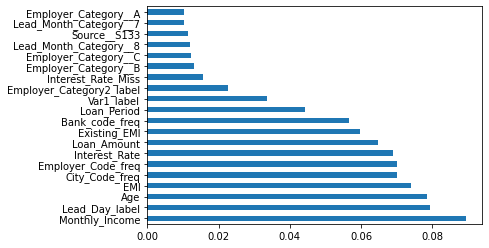

In [761]:
#Feature Graph
X = X_train_scaled  #independent columns
y = y   #target column 
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier(random_state=80)
model.fit(X_train_scaled,y)
print(model.feature_importances_) 

#Using inbuilt class feature_importances of tree based classifiers
#ploting graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X_train_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [762]:
features=feat_importances.nlargest(20)
features=features.to_dict()

In [763]:
def getList(dict):
      return [*dict]

In [764]:
lis=getList(features)
lis

['Monthly_Income',
 'Lead_Day_label',
 'Age',
 'EMI',
 'City_Code_freq',
 'Employer_Code_freq',
 'Interest_Rate',
 'Loan_Amount',
 'Existing_EMI',
 'Bank_code_freq',
 'Loan_Period',
 'Var1_label',
 'Employer_Category2_label',
 'Interest_Rate_Miss',
 'Employer_Category__B',
 'Employer_Category__C',
 'Lead_Month_Category__8',
 'Source__S133',
 'Lead_Month_Category__7',
 'Employer_Category__A']

In [765]:
l=['Monthly_Income',
 'Lead_Day_label',
 'Age',
 'EMI',
 'City_Code_freq',
 'Employer_Code_freq',
 'Interest_Rate',
 'Loan_Amount',
 'Existing_EMI',
 'Bank_code_freq',
 'Loan_Period',
 'Var1_label',
 'Employer_Category2_label',
 'Interest_Rate_Miss',
 'Employer_Category__B',
 'Lead_Month_Category__8',
 'Employer_Category__C',
 'Lead_Month_Category__7',
 'Employer_Category__A',
 'Source__S133']

In [766]:
X_train_logistic=X_train_scaled[l]

In [767]:
X_train_logistic.shape

(63003, 20)

#Logistic with balanced weight and penalty

In [768]:
from sklearn.linear_model import LogisticRegression

In [769]:
mod4 = LogisticRegression(random_state=57, n_jobs=24, class_weight='balanced', penalty='l2')
np.mean(cross_val_score(mod4, X_train_logistic, y, cv=kfold, scoring='roc_auc'))

0.7817604867982817

###Its cross_val_score is worse than Random Forest.

#Logistic Regression with class weight

In [771]:
weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=LogisticRegression(random_state=83),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='roc_auc',
    cv=5
)

grid_result = gsc.fit(X_train_logistic, y)
print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'class_weight': {0: 0.05, 1: 0.95}}


In [772]:
mod5 = LogisticRegression(**grid_result.best_params_, random_state=84)
np.mean(cross_val_score(mod5, X_train_logistic, y, cv=kfold, scoring='roc_auc'))

0.7734644117875598

###By looking at the cross_val_score It is safe to say that Random froest is performing well than logistic regression.

#Random Forest with Smote

In [773]:
RMC = RandomForestClassifier

In [775]:
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), \
                                   RMC(random_state=47))

mod6= smote_pipeline.fit(X_train, y_train)
np.mean(cross_val_score(mod6, X_train_scaled, y, cv=kfold, scoring='roc_auc'))


0.8086112579864428

###Random Forest with Smote performance is better than Logistic Regression

####No model is performing sufficiently well on performance criteria i.e, AUC_ROC so far. so now I'm tring XG Boost and see if it can give better results.

#XG Boost

In [817]:
#Importing Library

import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

In [818]:
#Create function for Accuracy & Precision
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    pass

In [819]:
#Function for automationg the xg boost model building performance with XG Bosst.

def modelfit(mod, X_train_scaled, col, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = mod.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train_scaled[col].values, label=y.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=mod.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        mod.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    mod.fit(X_train_scaled[col], y,eval_metric='auc')
        
    #Predict training set:
    train_predictions = mod.predict(X_train_scaled[col])
    train_predprob = mod.predict_proba(X_train_scaled[col])[:,1]
        
    #Print model report:
    print ("\Report")
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y, train_predprob))
    print("Metrics:",generate_model_report(y, train_predictions))
    


In [820]:
col=X_train_scaled.columns

In [821]:
#Model 7

xgb1 = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight=1,colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1,random_state=102)

modelfit(xgb1, X_train_scaled, col)

\Report
AUC Score (Train): 0.926192
Accuracy =  0.9842071012491469
Precision =  1.0
Metrics: None


In [826]:
prob = xgb1.predict(X_test_scaled)

In [829]:
final_df = pd.DataFrame({"ID": id_test, "Approved": prob})
#final_df.to_csv("Model_submission.csv", header=True, index = False)

In [831]:
final_df.head(20)

,ID,Approved
0,APPA70109647212,0
1,APPB10687939341,0
2,APPC80449411414,0
3,APPD30665094501,0
4,APPE80379821637,0
5,APPF90611935733,0
6,APPG20993415813,0
7,APPH30656456927,0
8,APPI70297912043,0
9,APPJ50119937105,0


In [834]:
final_df.shape

(27143, 2)